# import libraries

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.ticker import FuncFormatter
matplotlib.style.use('ggplot')
import sqlite3 
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

In [2]:
import pandas as pd
import urllib

In [3]:
from shapely.geometry import Point
from geopandas import GeoDataFrame

# upload dataframe

### NYC map

<AxesSubplot:>

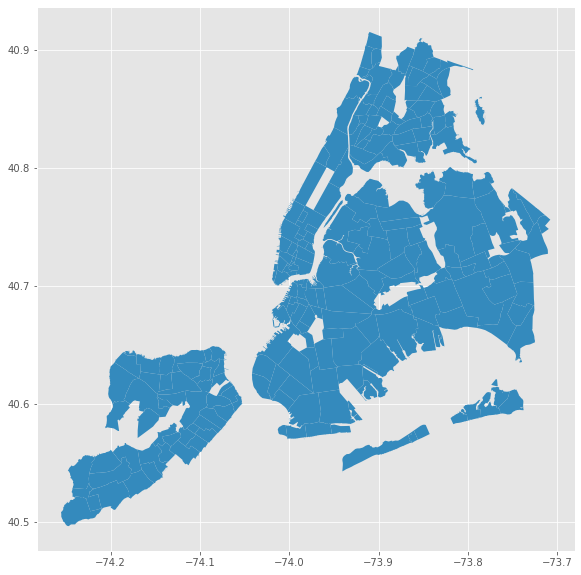

In [4]:
neighbourhoods = gpd.read_file('neighbourhoods.geojson')
neighbourhoods.plot(figsize=(10,10))

### subway station map

In [5]:
station = pd.read_csv('stationlocation.csv')
station.head()

,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4.0,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5.0,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


In [6]:
station.describe()

,ogc_fid,station_id,gtfs_latitude,gtfs_longitude
count,513.000000,496.000000,513.000000,513.000000
mean,257.000000,248.967742,40.723393,-73.947946
std,148.234611,144.854030,0.081171,0.071323
min,1.000000,1.000000,40.512764,-74.251961
25%,129.000000,124.750000,40.674542,-73.988691
50%,257.000000,247.500000,40.718315,-73.953260
75%,385.000000,371.250000,40.768247,-73.903879
max,513.000000,523.000000,40.903125,-73.755405


In [7]:
from shapely.geometry import Point

Geometrysta = [Point(xy) for xy in zip(station.gtfs_longitude, station.gtfs_latitude)]
stationgeo = gpd.GeoDataFrame(station,geometry=Geometrysta,crs={'init': 'epsg:4326'})

In [8]:
stationgeo.head()

,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,POINT (-73.91203 40.77504)
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,POINT (-73.91784 40.77026)
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92148 40.76678)
3,4,4.0,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92551 40.76182)
4,5,5.0,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92957 40.75680)


<AxesSubplot:>

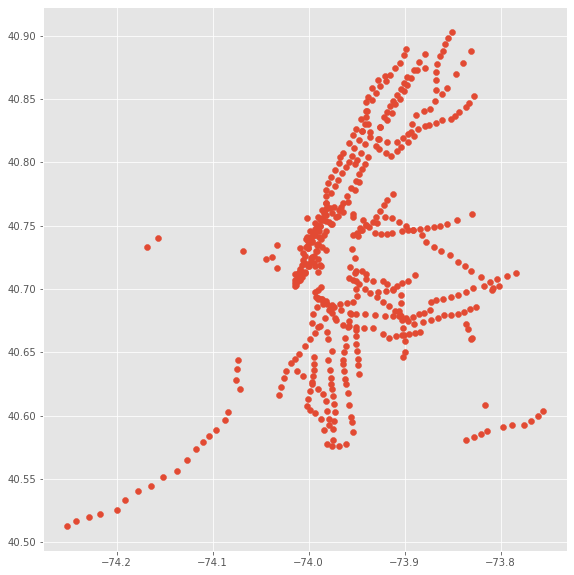

In [9]:
stationgeo.plot(figsize=(10,10))

### Turnstile dataset (Jan. 2019)

In [10]:
df190105 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190105.txt')
df190105

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,2335936
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,11:00:00,REGULAR,6889364,2336038
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,15:00:00,REGULAR,6889605,2336101
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,19:00:00,REGULAR,6889966,2336173
...,...,...,...,...,...,...,...,...,...,...,...
201598,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/04/2019,11:36:26,REGULAR,5554,367
201599,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/04/2019,11:44:04,REGULAR,5554,367
201600,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/04/2019,12:00:00,REGULAR,5554,367
201601,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/04/2019,16:00:00,REGULAR,5554,367


In [11]:
df190112 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190112.txt')
print('df190112 is uploaded')
df190119 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190119.txt')
print('df190119 is uploaded')
df190126 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190126.txt')
print('df190126 is uploaded')
#df190202 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190102.txt')
#df190209 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190109.txt')
#df190216 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190116.txt')
#df190223 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190123.txt')

df190112 is uploaded
df190119 is uploaded
df190126 is uploaded


In [12]:
turnstiles = pd.concat([df190105, df190112, df190119, df190126]) #, df190202, df190209, df190216, df190223])
turnstiles.shape

(809019, 11)

In [13]:
turnstiles.describe()

,ENTRIES,EXITS
count,8.090190e+05,8.090190e+05
mean,4.055778e+07,3.365462e+07
std,2.083902e+08,1.937476e+08
min,0.000000e+00,0.000000e+00
25%,4.587530e+05,1.947475e+05
50%,2.386472e+06,1.380150e+06
75%,6.920179e+06,4.822016e+06
max,2.129552e+09,2.062478e+09


In [14]:
turnstiles.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,2335936
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,11:00:00,REGULAR,6889364,2336038
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,15:00:00,REGULAR,6889605,2336101
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,19:00:00,REGULAR,6889966,2336173


### Turnstiles dataset (Jan. 2020)

In [15]:
df200104 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200104.txt')
print('df200104 is uploaded')
df200111 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200111.txt')
print('df200111 is uploaded')
df200118 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200118.txt')
print('df200118 is uploaded')
df200125 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200125.txt')
print('df200125 is uploaded')

df200104 is uploaded
df200111 is uploaded
df200118 is uploaded
df200125 is uploaded


In [16]:
turnstiles2 = pd.concat([df200104, df200111, df200118, df200125]) #, df190202, df190209, df190216, df190223])
turnstiles2.shape

(823294, 11)

In [17]:
turnstiles2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713


# Descriptive Analysis

### trend of turnstile dataset

### create new columns (seperate a day into morning and afternoon) for 2020

In [18]:
turnstiles2.columns =['C/A','unit','SCP','Station','linename','division','date','time','desc','entries','exits']
turnstiles2['datetime'] = pd.to_datetime(turnstiles2.date + ' ' + turnstiles2.time, format='%m/%d/%Y  %H:%M:%S')
turnstiles2['turnstile'] = turnstiles2['C/A'] + '-' + turnstiles2['unit'] + '-' + turnstiles2['SCP']
turnstiles2.head()

,C/A,unit,SCP,Station,linename,division,date,time,desc,entries,exits,datetime,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594,2019-12-28 11:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647,2019-12-28 15:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713,2019-12-28 19:00:00,A002-R051-02-00-00


In [22]:
stationgeo['stopname'] = stationgeo.stop_name.str.lower()

In [23]:
turnstiles2['stopname'] = turnstiles2.Station.str.lower()
stationdf2 = pd.merge(turnstiles2, stationgeo, how='left', on='stopname')
stationdf2.head()

,C/A,unit,SCP,Station,linename,division_x,date,time,desc,entries,...,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,...,4th Av,59 St,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,POINT (-74.01788 40.64136)
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,...,Lexington Av,59 St,M,4 5 6,Subway,40.762526,-73.967967,Uptown & The Bronx,Downtown & Brooklyn,POINT (-73.96797 40.76253)
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,...,4th Av,59 St,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,POINT (-74.01788 40.64136)
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,...,Lexington Av,59 St,M,4 5 6,Subway,40.762526,-73.967967,Uptown & The Bronx,Downtown & Brooklyn,POINT (-73.96797 40.76253)
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,...,4th Av,59 St,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,POINT (-74.01788 40.64136)


In [24]:
# because difr stations share the same name
turnstiles2.shape,stationdf2.shape

((823294, 14), (1364899, 29))

In [25]:
stationdf2 = stationdf2[['stopname','linename','date','time','entries','exits','datetime' ,'turnstile','borough', 'gtfs_latitude', 'gtfs_longitude','geometry']]
stationdf2.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry
0,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
1,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
2,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
3,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
4,59 st,NQR456W,12/28/2019,11:00:00,7324371,2482594,2019-12-28 11:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)


In [26]:
stationdf2.dropna(inplace=True)
stationdf2.shape

(983949, 12)

In [27]:
stationdf2.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry
0,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
1,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
2,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
3,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
4,59 st,NQR456W,12/28/2019,11:00:00,7324371,2482594,2019-12-28 11:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)


In [36]:
#import datetime as dt
turnstiles.DATE = pd.to_datetime(turnstiles.DATE)

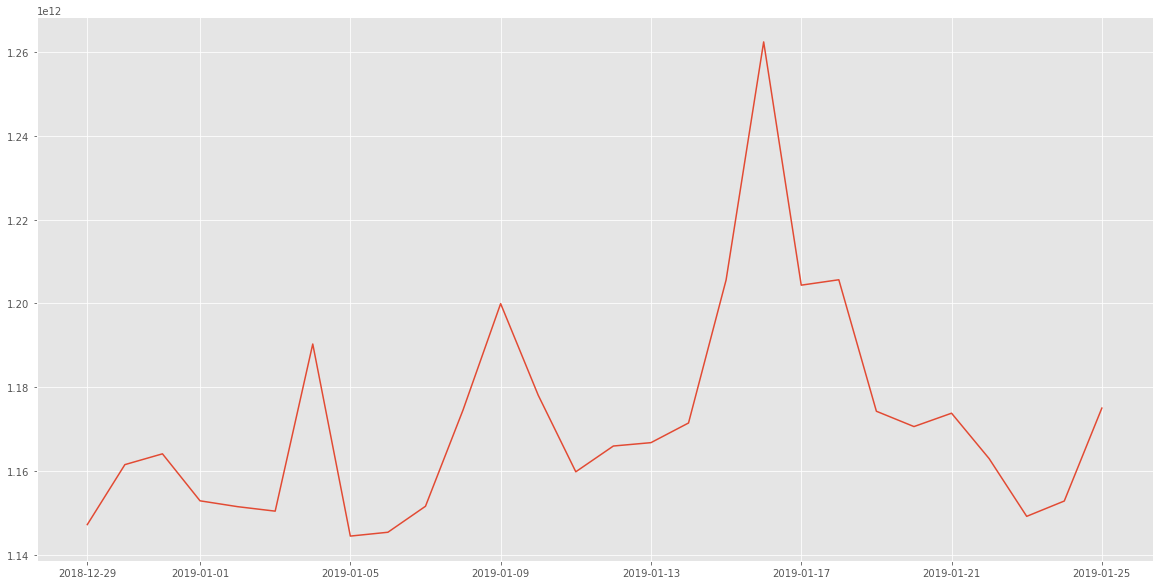

In [37]:
plt.figure(figsize=(20,10))
plt.plot(turnstiles.groupby(by='DATE')['ENTRIES'].sum())

### create new columns (seperate a day into morning and afternoon) for 2019

In [38]:
turnstiles.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,03:00:00,REGULAR,6889287,2335920
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,07:00:00,REGULAR,6889299,2335936
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,11:00:00,REGULAR,6889364,2336038
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,15:00:00,REGULAR,6889605,2336101
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,19:00:00,REGULAR,6889966,2336173


In [39]:
turnstiles.columns =['C/A','unit','SCP','Station','linename','division','date','time','desc','entries','exits']
turnstiles.head()

,C/A,unit,SCP,Station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,03:00:00,REGULAR,6889287,2335920
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,07:00:00,REGULAR,6889299,2335936
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,11:00:00,REGULAR,6889364,2336038
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,15:00:00,REGULAR,6889605,2336101
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-12-29,19:00:00,REGULAR,6889966,2336173


In [42]:
turnstiles['datetime'] = pd.to_datetime(str(turnstiles.date) + ' ' + turnstiles.time, format='%m/%d/%Y  %H:%M:%S')
turnstiles['turnstile'] = turnstiles['C/A'] + '-' + turnstiles['unit'] + '-' + turnstiles['SCP']
turnstiles.head()

ValueError: time data '0        2018-12-29
1        2018-12-29
2        2018-12-29
3        2018-12-29
4        2018-12-29
            ...    
201594   2019-01-25
201595   2019-01-25
201596   2019-01-25
201597   2019-01-25
201598   2019-01-25
Name: date, Length: 809019, dtype: datetime64[ns] 03:00:00' does not match format '%m/%d/%Y  %H:%M:%S' (match)

In [18]:
print('Descriptions of entries:')
print('total entries:', turnstiles['entries'].sum())
print(turnstiles['entries'].describe())
print('')
print('Descriptions of exits:')
print('total exits:', turnstiles['exits'].sum())
print(turnstiles['exits'].describe())

Descriptions of entries:
total entries: 32812017087180
count    8.090190e+05
mean     4.055778e+07
std      2.083902e+08
min      0.000000e+00
25%      4.587530e+05
50%      2.386472e+06
75%      6.920179e+06
max      2.129552e+09
Name: entries, dtype: float64

Descriptions of exits:
total exits: 27227224273444
count    8.090190e+05
mean     3.365462e+07
std      1.937476e+08
min      0.000000e+00
25%      1.947475e+05
50%      1.380150e+06
75%      4.822016e+06
max      2.062478e+09
Name: exits, dtype: float64


In [20]:
# group data by turnstile, sort each turnstile by datetime
# Create new columns en_diff and ex_diff for each unique turnstile
# turn cumulative counts into counts per interval

mta_sorted = turnstiles.sort_values(['turnstile', 'datetime'])
mta_sorted = mta_sorted.reset_index(drop = True)

turnstile_grouped = mta_sorted.groupby(['turnstile'])

mta_sorted['entries_diff'] = turnstile_grouped['entries'].transform(pd.Series.diff)
mta_sorted['exits_diff'] = turnstile_grouped['exits'].transform(pd.Series.diff)

mta_sorted.head()

,C/A,unit,SCP,Station,linename,division,date,time,desc,entries,exits,datetime,turnstile,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920,2018-12-29 03:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,2335936,2018-12-29 07:00:00,A002-R051-02-00-00,12.0,16.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,11:00:00,REGULAR,6889364,2336038,2018-12-29 11:00:00,A002-R051-02-00-00,65.0,102.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,15:00:00,REGULAR,6889605,2336101,2018-12-29 15:00:00,A002-R051-02-00-00,241.0,63.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,19:00:00,REGULAR,6889966,2336173,2018-12-29 19:00:00,A002-R051-02-00-00,361.0,72.0


In [22]:
stationgeo['stopname'] = stationgeo.stop_name.str.lower()
stationgeo.head()

,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry,stopname
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,POINT (-73.91203 40.77504),astoria - ditmars blvd
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,POINT (-73.91784 40.77026),astoria blvd
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92148 40.76678),30 av
3,4,4.0,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92551 40.76182),broadway
4,5,5.0,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92957 40.75680),36 av


In [23]:
turnstiles['stopname'] = turnstiles.Station.str.lower()
turnstiles.head()

,C/A,unit,SCP,Station,linename,division,date,time,desc,entries,exits,datetime,turnstile,stopname
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920,2018-12-29 03:00:00,A002-R051-02-00-00,59 st
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,2335936,2018-12-29 07:00:00,A002-R051-02-00-00,59 st
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,11:00:00,REGULAR,6889364,2336038,2018-12-29 11:00:00,A002-R051-02-00-00,59 st
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,15:00:00,REGULAR,6889605,2336101,2018-12-29 15:00:00,A002-R051-02-00-00,59 st
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,19:00:00,REGULAR,6889966,2336173,2018-12-29 19:00:00,A002-R051-02-00-00,59 st


In [24]:
stationdf = pd.merge(turnstiles, stationgeo, how='left', on='stopname')
stationdf.head()

,C/A,unit,SCP,Station,linename,division_x,date,time,desc,entries,...,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,...,4th Av,59 St,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,POINT (-74.01788 40.64136)
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,...,Lexington Av,59 St,M,4 5 6,Subway,40.762526,-73.967967,Uptown & The Bronx,Downtown & Brooklyn,POINT (-73.96797 40.76253)
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,...,4th Av,59 St,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,POINT (-74.01788 40.64136)
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,...,Lexington Av,59 St,M,4 5 6,Subway,40.762526,-73.967967,Uptown & The Bronx,Downtown & Brooklyn,POINT (-73.96797 40.76253)
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,11:00:00,REGULAR,6889364,...,4th Av,59 St,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,POINT (-74.01788 40.64136)


In [25]:
# df grows longer becaus it counts twice (north / south - direction)
stationdf.shape

(1332043, 29)

In [26]:
stationdf.dropna().shape

(929880, 29)

In [27]:
stationdf.columns

Index(['C/A', 'unit', 'SCP', 'Station', 'linename', 'division_x', 'date',
       'time', 'desc', 'entries', 'exits', 'datetime', 'turnstile', 'stopname',
       'ogc_fid', 'station_id', 'complex_id', 'gtfs_stop_id', 'division_y',
       'line', 'stop_name', 'borough', 'daytime_routes', 'structure',
       'gtfs_latitude', 'gtfs_longitude', 'north_direction_label',
       'south_direction_label', 'geometry'],
      dtype='object')

In [28]:
stationdf = stationdf[['stopname','linename','date','time','entries','exits','datetime' ,'turnstile','borough', 'gtfs_latitude', 'gtfs_longitude','geometry']]
stationdf.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry
0,59 st,NQR456W,12/29/2018,03:00:00,6889287,2335920,2018-12-29 03:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
1,59 st,NQR456W,12/29/2018,03:00:00,6889287,2335920,2018-12-29 03:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
2,59 st,NQR456W,12/29/2018,07:00:00,6889299,2335936,2018-12-29 07:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
3,59 st,NQR456W,12/29/2018,07:00:00,6889299,2335936,2018-12-29 07:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
4,59 st,NQR456W,12/29/2018,11:00:00,6889364,2336038,2018-12-29 11:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)


In [29]:
stationdf.dropna(inplace=True)
stationdf.shape

(954718, 12)

In [30]:
stationdf.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry
0,59 st,NQR456W,12/29/2018,03:00:00,6889287,2335920,2018-12-29 03:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
1,59 st,NQR456W,12/29/2018,03:00:00,6889287,2335920,2018-12-29 03:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
2,59 st,NQR456W,12/29/2018,07:00:00,6889299,2335936,2018-12-29 07:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
3,59 st,NQR456W,12/29/2018,07:00:00,6889299,2335936,2018-12-29 07:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
4,59 st,NQR456W,12/29/2018,11:00:00,6889364,2336038,2018-12-29 11:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)


### something strange here

Text(0.5, 1.0, 'entries and subway stations in New York City')

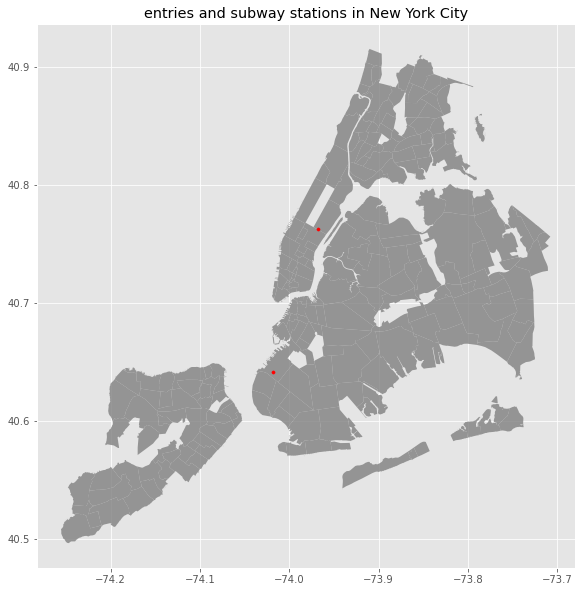

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
#Entry.plot(column=2019, ax=ax, legend=True, scheme='quantiles', k=10)
stationgeo[stationgeo.stopname=='59 st'].plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('entries and subway stations in New York City')

### seperate morning and afternoon

In [33]:
from datetime import datetime as dt

In [34]:
stationdf['hour'] = stationdf.datetime.dt.hour

In [35]:
turnstiles_morning = stationdf.loc[(stationdf['hour'] < 12)]
turnstiles_morning.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry,hour
0,59 st,NQR456W,12/29/2018,03:00:00,6889287,2335920,2018-12-29 03:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),3
1,59 st,NQR456W,12/29/2018,03:00:00,6889287,2335920,2018-12-29 03:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),3
2,59 st,NQR456W,12/29/2018,07:00:00,6889299,2335936,2018-12-29 07:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),7
3,59 st,NQR456W,12/29/2018,07:00:00,6889299,2335936,2018-12-29 07:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),7
4,59 st,NQR456W,12/29/2018,11:00:00,6889364,2336038,2018-12-29 11:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),11


In [36]:
turnstiles_morning.shape

(481338, 13)

In [37]:
turnstiles_afternoon = stationdf.loc[(stationdf['hour'] > 11)]
turnstiles_afternoon.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry,hour
6,59 st,NQR456W,12/29/2018,15:00:00,6889605,2336101,2018-12-29 15:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),15
7,59 st,NQR456W,12/29/2018,15:00:00,6889605,2336101,2018-12-29 15:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),15
8,59 st,NQR456W,12/29/2018,19:00:00,6889966,2336173,2018-12-29 19:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),19
9,59 st,NQR456W,12/29/2018,19:00:00,6889966,2336173,2018-12-29 19:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),19
10,59 st,NQR456W,12/29/2018,23:00:00,6890186,2336219,2018-12-29 23:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),23


In [38]:
turnstiles_afternoon.shape

(473380, 13)

In [62]:
stationdf2['hour'] = stationdf2.datetime.dt.hour
turnstiles_morning2 = stationdf2.loc[(stationdf2['hour'] < 12)]
turnstiles_morning2.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry,hour
0,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),3
1,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),3
2,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),7
3,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),7
4,59 st,NQR456W,12/28/2019,11:00:00,7324371,2482594,2019-12-28 11:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),11


In [63]:
turnstiles_afternoon2 = stationdf2.loc[(stationdf2['hour'] > 11)]
turnstiles_afternoon2.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry,hour
6,59 st,NQR456W,12/28/2019,15:00:00,7324587,2482647,2019-12-28 15:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),15
7,59 st,NQR456W,12/28/2019,15:00:00,7324587,2482647,2019-12-28 15:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),15
8,59 st,NQR456W,12/28/2019,19:00:00,7324963,2482713,2019-12-28 19:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),19
9,59 st,NQR456W,12/28/2019,19:00:00,7324963,2482713,2019-12-28 19:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),19
10,59 st,NQR456W,12/28/2019,23:00:00,7325143,2482753,2019-12-28 23:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),23


### need to:
1. groupby 'morning';
2. entries - exits to show whether it is 'a working station' or 'a living station'

### number of entries and exits of every station (seperate morning and afternoon) for 2020

In [64]:
morning2 = turnstiles_morning2[['stopname','entries','exits','geometry']]
morning2 = morning2.groupby('stopname').agg({'entries':'sum','exits':'sum'})
morning2 = morning2.merge(stationgeo,on='stopname',how='left')
morning2 = morning2[['stopname','entries','exits','geometry']]
morning2 = gpd.GeoDataFrame(morning2)
morning2['diff'] = morning2.entries - morning2.exits
morning2.head()

,stopname,entries,exits,geometry,diff
0,1 av,38352740552,37417562183,POINT (-73.98163 40.73095),935178369
1,103 st,33630369549,29398293552,POINT (-73.96145 40.79609),4232075997
2,103 st,33630369549,29398293552,POINT (-73.96838 40.79945),4232075997
3,103 st,33630369549,29398293552,POINT (-73.94748 40.79060),4232075997
4,104 st,284118554494,166274814784,POINT (-73.84433 40.69518),117843739710


Text(0.5, 1.0, 'Difference between Entries and Exits in New York City (Morning)')

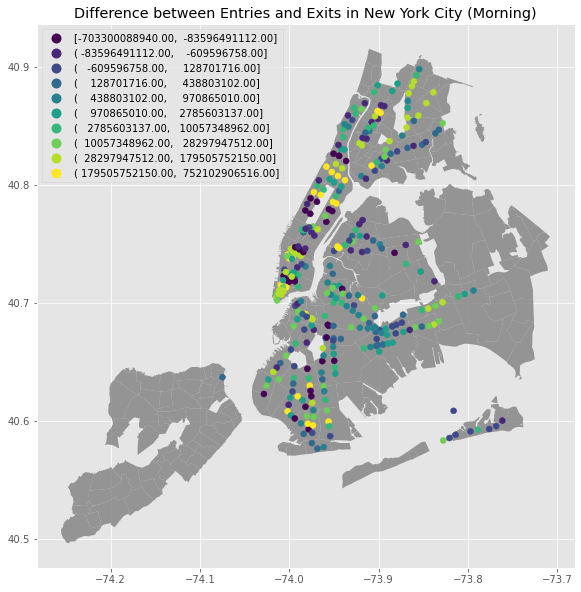

In [65]:
# purple means 'working stations'; yellow means 'living stations'
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
morning2.plot(column='diff', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Difference between Entries and Exits in New York City (Morning)')

Text(0.5, 1.0, 'Entries and Subway Stations in New York City (Morning)')

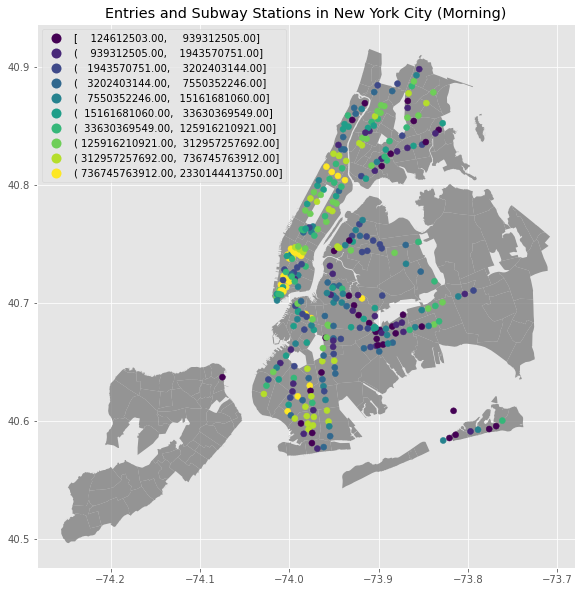

In [66]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
morning2.plot(column='entries', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Entries and Subway Stations in New York City (Morning)')

Text(0.5, 1.0, 'Exits and Subway Stations in New York City (Morning)')

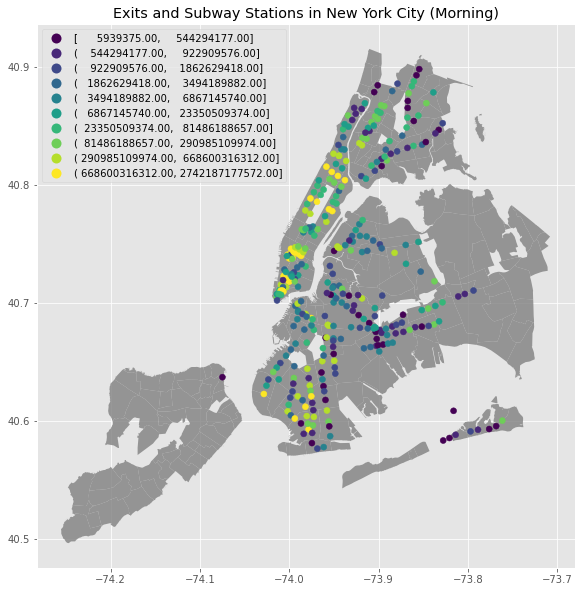

In [67]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
morning2.plot(column='exits', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Exits and Subway Stations in New York City (Morning)')

In [69]:
afternoon2 = turnstiles_afternoon2[['stopname','entries','exits','geometry']]
afternoon2 = afternoon2.groupby('stopname').agg({'entries':'sum','exits':'sum'})
afternoon2 = afternoon2.merge(stationgeo,on='stopname',how='left')
afternoon2 = afternoon2[['stopname','entries','exits','geometry']]
afternoon2 = gpd.GeoDataFrame(afternoon2)
afternoon2['diff'] = afternoon2.entries - afternoon2.exits
afternoon2.head()

,stopname,entries,exits,geometry,diff
0,1 av,38353442460,37418371171,POINT (-73.98163 40.73095),935071289
1,103 st,33496562304,29243768859,POINT (-73.96145 40.79609),4252793445
2,103 st,33496562304,29243768859,POINT (-73.96838 40.79945),4252793445
3,103 st,33496562304,29243768859,POINT (-73.94748 40.79060),4252793445
4,104 st,284118855042,166274959262,POINT (-73.84433 40.69518),117843895780


Text(0.5, 1.0, 'Difference between Entries and Exits in New York City (Afternoon)')

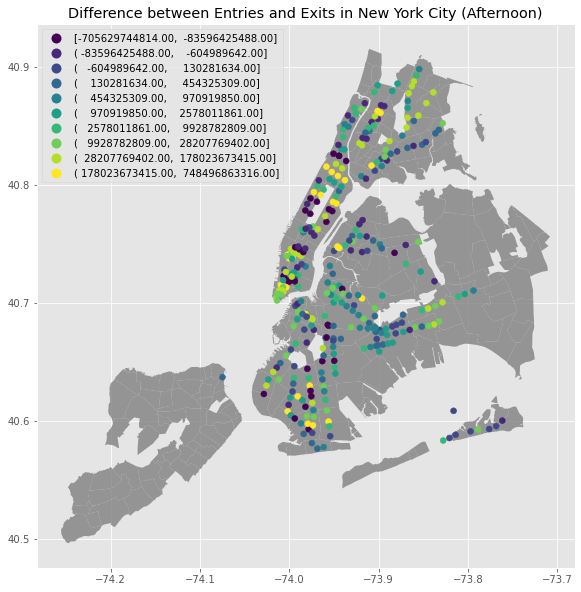

In [70]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
afternoon2.plot(column='diff', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Difference between Entries and Exits in New York City (Afternoon)')

Text(0.5, 1.0, 'Entries and Subway Stations in New York City (Afternoon)')

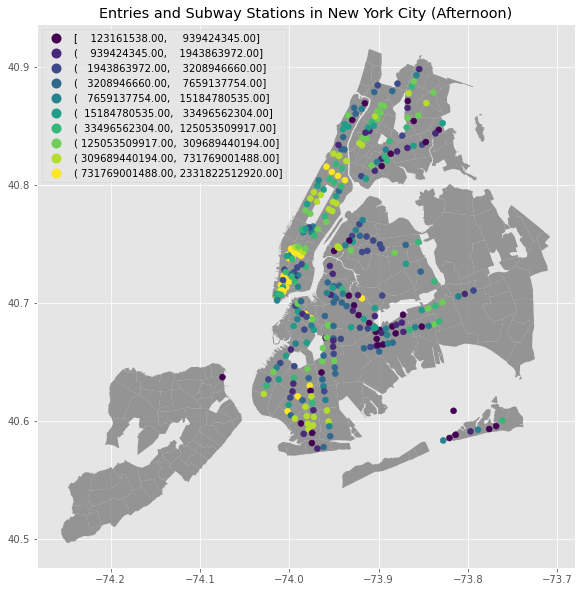

In [71]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
afternoon2.plot(column='entries', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Entries and Subway Stations in New York City (Afternoon)')

Text(0.5, 1.0, 'Exits and Subway Stations in New York City (Afternoon)')

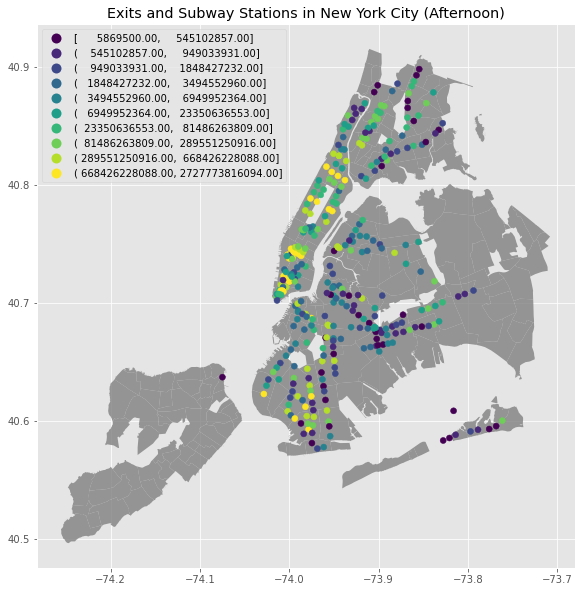

In [72]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
afternoon2.plot(column='exits', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Exits and Subway Stations in New York City (Afternoon)')

### number of entries and exits of every station (seperate morning and afternoon) for 2019

In [39]:
morning = turnstiles_morning[['stopname','entries','exits','geometry']]
morning = morning.groupby('stopname').agg({'entries':'sum','exits':'sum'})
morning = morning.merge(stationgeo,on='stopname',how='left')
morning = morning[['stopname','entries','exits','geometry']]
morning.head()

,stopname,entries,exits,geometry
0,1 av,255467553858,136888039757,POINT (-73.98163 40.73095)
1,103 st,40118063790,153590229564,POINT (-73.96145 40.79609)
2,103 st,40118063790,153590229564,POINT (-73.96838 40.79945)
3,103 st,40118063790,153590229564,POINT (-73.94748 40.79060)
4,104 st,834802303284,604681146548,POINT (-73.84433 40.69518)


In [40]:
morning = gpd.GeoDataFrame(morning)

In [41]:
morning['diff'] = morning.entries - morning.exits
morning.head()

,stopname,entries,exits,geometry,diff
0,1 av,255467553858,136888039757,POINT (-73.98163 40.73095),118579514101
1,103 st,40118063790,153590229564,POINT (-73.96145 40.79609),-113472165774
2,103 st,40118063790,153590229564,POINT (-73.96838 40.79945),-113472165774
3,103 st,40118063790,153590229564,POINT (-73.94748 40.79060),-113472165774
4,104 st,834802303284,604681146548,POINT (-73.84433 40.69518),230121156736


NameError: name 'tripsByDay' is not defined

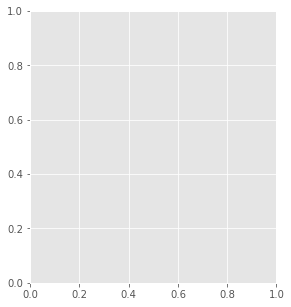

In [42]:
plt.figure(figsize=(15, 5))
plt.figure(1)
ax1 = plt.subplot(131)
plt.bar(tripsByDay.pickUpDay, tripsByDay.NumberofTrips)
plt.xticks(tripsByDay.pickUpDay)
plt.ylabel('number of trips', fontsize=14)
plt.xlabel('day of week', fontsize=14)

ax2 = plt.subplot(132)
plt.bar(tripsByDay.pickUpDay, tripsByDay.speed)
plt.xticks(tripsByDay.pickUpDay)
plt.ylabel('average speed', fontsize=14)
plt.xlabel('day of week', fontsize=14)

ax3 = plt.subplot(133)
plt.bar(tripsByDay.pickUpDay, tripsByDay.trip_distance)
plt.xticks(tripsByDay.pickUpDay)
plt.ylabel('sum of trip distancee', fontsize=14)
plt.xlabel('day of week', fontsize=14)

Text(0.5, 1.0, 'Difference between Entries and Exits in New York City (Morning)')

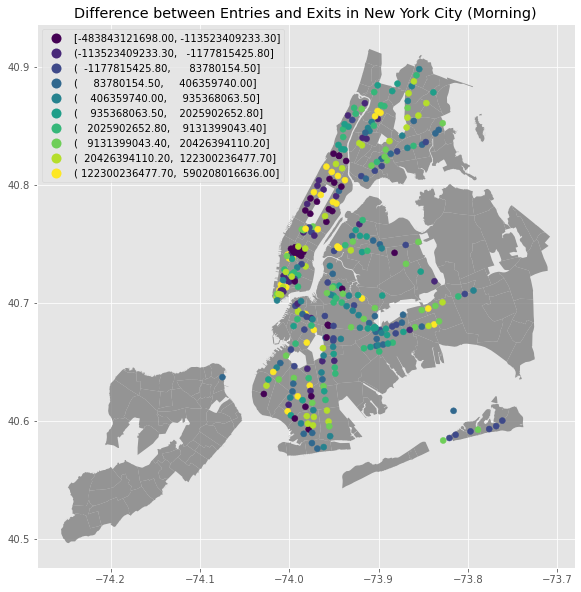

In [43]:
# purple means 'working stations'; yellow means 'living stations'
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
morning.plot(column='diff', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Difference between Entries and Exits in New York City (Morning)')

Text(0.5, 1.0, 'Entries and Subway Stations in New York City (Morning)')

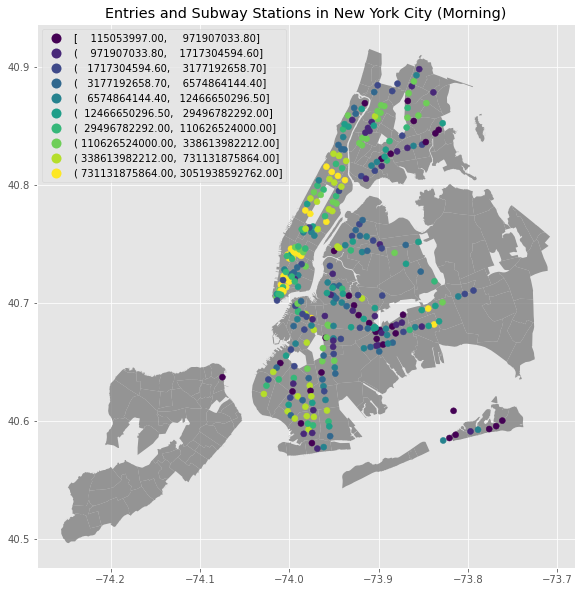

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
morning.plot(column='entries', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Entries and Subway Stations in New York City (Morning)')

Text(0.5, 1.0, 'Exits and Subway Stations in New York City (Morning)')

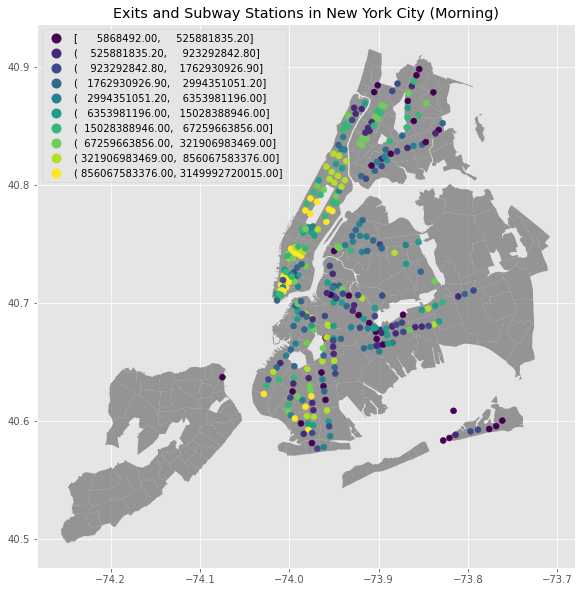

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
morning.plot(column='exits', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Exits and Subway Stations in New York City (Morning)')

In [46]:
afternoon = turnstiles_afternoon[['stopname','entries','exits','geometry']]
afternoon = afternoon.groupby('stopname').agg({'entries':'sum','exits':'sum'})
afternoon = afternoon.merge(stationgeo,on='stopname',how='left')
afternoon = afternoon[['stopname','entries','exits','geometry']]
afternoon.head()

,stopname,entries,exits,geometry
0,1 av,255468453493,136889066637,POINT (-73.98163 40.73095)
1,103 st,39730987959,151850559423,POINT (-73.96145 40.79609)
2,103 st,39730987959,151850559423,POINT (-73.96838 40.79945)
3,103 st,39730987959,151850559423,POINT (-73.94748 40.79060)
4,104 st,814515048494,592807979486,POINT (-73.84433 40.69518)


In [47]:
afternoon = gpd.GeoDataFrame(afternoon)
type(afternoon)

geopandas.geodataframe.GeoDataFrame

In [48]:
afternoon['diff'] = afternoon.entries - afternoon.exits
afternoon.head()

,stopname,entries,exits,geometry,diff
0,1 av,255468453493,136889066637,POINT (-73.98163 40.73095),118579386856
1,103 st,39730987959,151850559423,POINT (-73.96145 40.79609),-112119571464
2,103 st,39730987959,151850559423,POINT (-73.96838 40.79945),-112119571464
3,103 st,39730987959,151850559423,POINT (-73.94748 40.79060),-112119571464
4,104 st,814515048494,592807979486,POINT (-73.84433 40.69518),221707069008


Text(0.5, 1.0, 'Difference between Entries and Exits in New York City (Afternoon)')

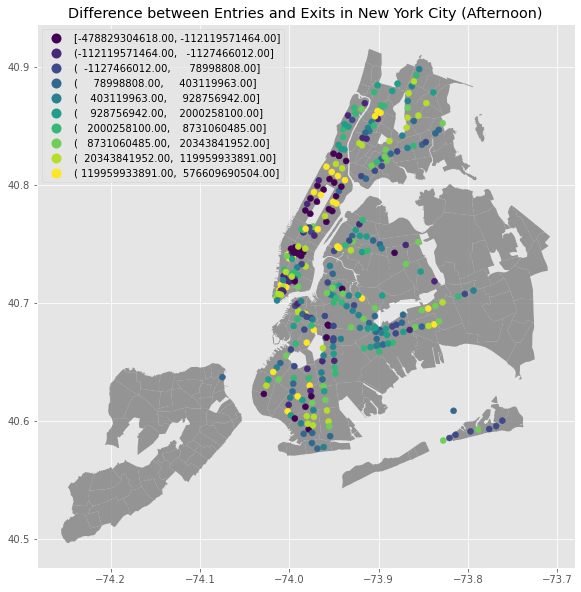

In [49]:
# purple means 'working stations'; yellow means 'living stations'
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
afternoon.plot(column='diff', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Difference between Entries and Exits in New York City (Afternoon)')

Text(0.5, 1.0, 'Entries and Subway Stations in New York City (Afternoon)')

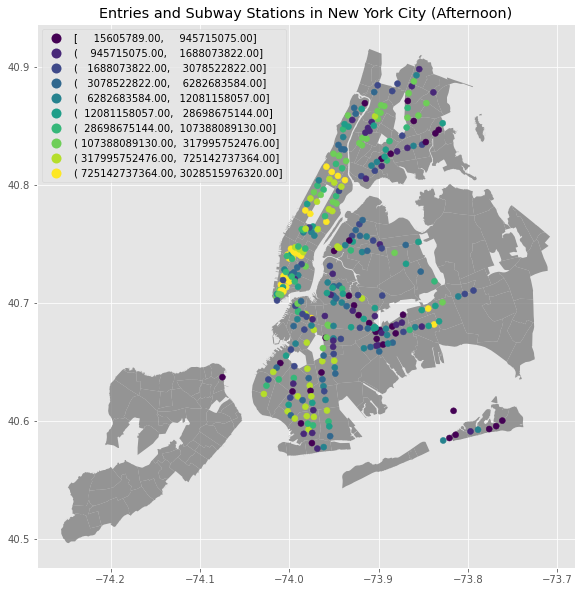

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
afternoon.plot(column='entries', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Entries and Subway Stations in New York City (Afternoon)')

Text(0.5, 1.0, 'Exits and Subway Stations in New York City (Afternoon)')

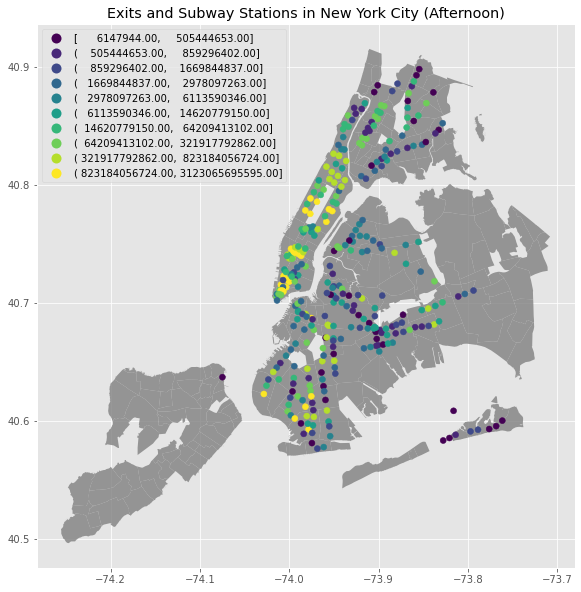

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
afternoon.plot(column='exits', ax=ax, legend=True, scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Exits and Subway Stations in New York City (Afternoon)')

### difference between entries and exits of every station (seperate morning and afternoon)

In [82]:
mta_morning = morning.merge(morning2, on='stopname', suffixes=['_2019', '_2020'])
mta_morning.head()

,stopname,entries_2019,exits_2019,geometry_2019,diff_2019,entries_2020,exits_2020,geometry_2020,diff_2020
0,1 av,255467553858,136888039757,POINT (-73.98163 40.73095),118579514101,38352740552,37417562183,POINT (-73.98163 40.73095),935178369
1,103 st,40118063790,153590229564,POINT (-73.96145 40.79609),-113472165774,33630369549,29398293552,POINT (-73.96145 40.79609),4232075997
2,103 st,40118063790,153590229564,POINT (-73.96145 40.79609),-113472165774,33630369549,29398293552,POINT (-73.96838 40.79945),4232075997
3,103 st,40118063790,153590229564,POINT (-73.96145 40.79609),-113472165774,33630369549,29398293552,POINT (-73.94748 40.79060),4232075997
4,103 st,40118063790,153590229564,POINT (-73.96838 40.79945),-113472165774,33630369549,29398293552,POINT (-73.96145 40.79609),4232075997


In [83]:
mta_afternoon = afternoon.merge(afternoon2, on='stopname', suffixes=['_2019', '_2020'])
mta_afternoon.head()

,stopname,entries_2019,exits_2019,geometry_2019,diff_2019,entries_2020,exits_2020,geometry_2020,diff_2020
0,1 av,255468453493,136889066637,POINT (-73.98163 40.73095),118579386856,38353442460,37418371171,POINT (-73.98163 40.73095),935071289
1,103 st,39730987959,151850559423,POINT (-73.96145 40.79609),-112119571464,33496562304,29243768859,POINT (-73.96145 40.79609),4252793445
2,103 st,39730987959,151850559423,POINT (-73.96145 40.79609),-112119571464,33496562304,29243768859,POINT (-73.96838 40.79945),4252793445
3,103 st,39730987959,151850559423,POINT (-73.96145 40.79609),-112119571464,33496562304,29243768859,POINT (-73.94748 40.79060),4252793445
4,103 st,39730987959,151850559423,POINT (-73.96838 40.79945),-112119571464,33496562304,29243768859,POINT (-73.96145 40.79609),4252793445


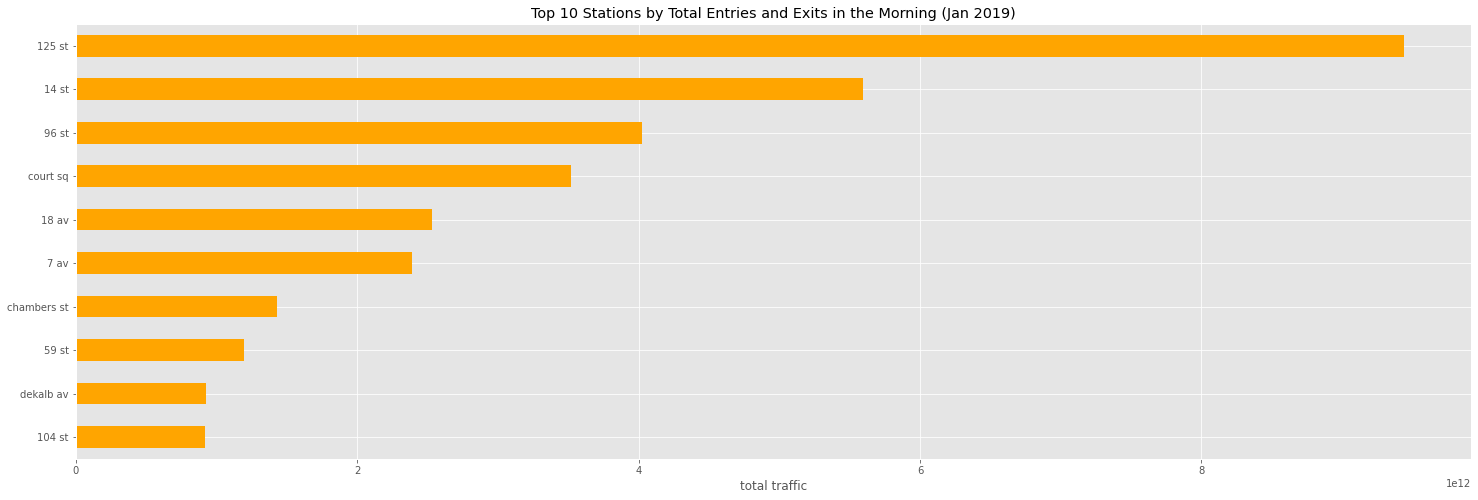

In [86]:
#10 busiest stations
top_10_morning_2019 =mta_morning.groupby(['stopname']).agg({'diff_2019': sum}).sort_values(by='diff_2019', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(25, 8))
top_10_morning_2019.sort_values(by='diff_2019',ascending=True).plot(kind='barh', color ='orange',ax=ax)
ax.set(title='Top 10 Stations by Total Entries and Exits in the Morning (Jan 2019)', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)

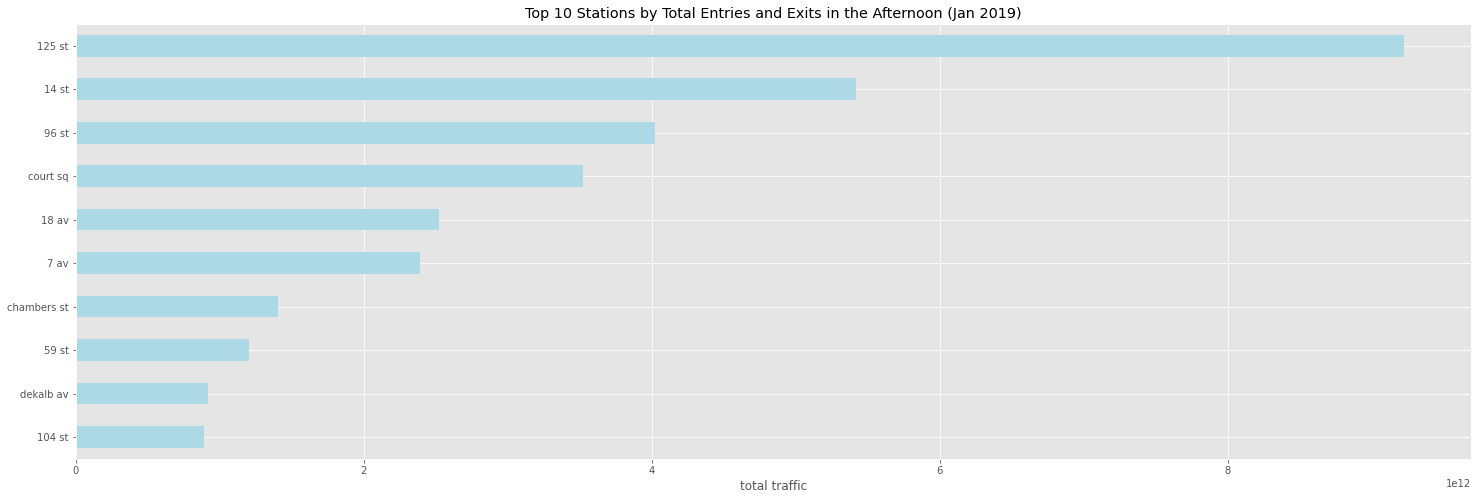

In [90]:
#10 busiest stations
top_10_afternoon_2019 =mta_afternoon.groupby(['stopname']).agg({'diff_2019': sum}).sort_values(by='diff_2019', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(25, 8))
top_10_afternoon_2019.sort_values(by='diff_2019',ascending=True).plot(kind='barh', color ='lightblue',ax=ax)
ax.set(title='Top 10 Stations by Total Entries and Exits in the Afternoon (Jan 2019)', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)

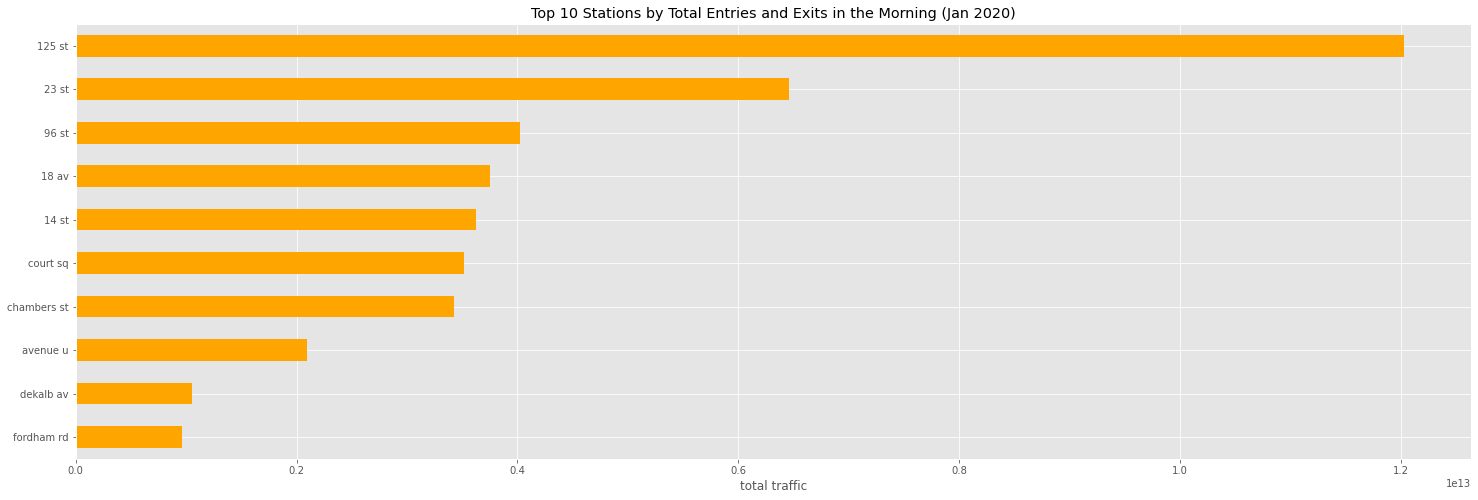

In [99]:
top_10_morning_2020 =mta_morning.groupby(['stopname']).agg({'diff_2020': sum}).sort_values(by='diff_2020', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(25, 8))
top_10_morning_2020.sort_values(by='diff_2020',ascending=True).plot(kind='barh', color ='orange',ax=ax)
ax.set(title='Top 10 Stations by Total Entries and Exits in the Morning (Jan 2020)', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)

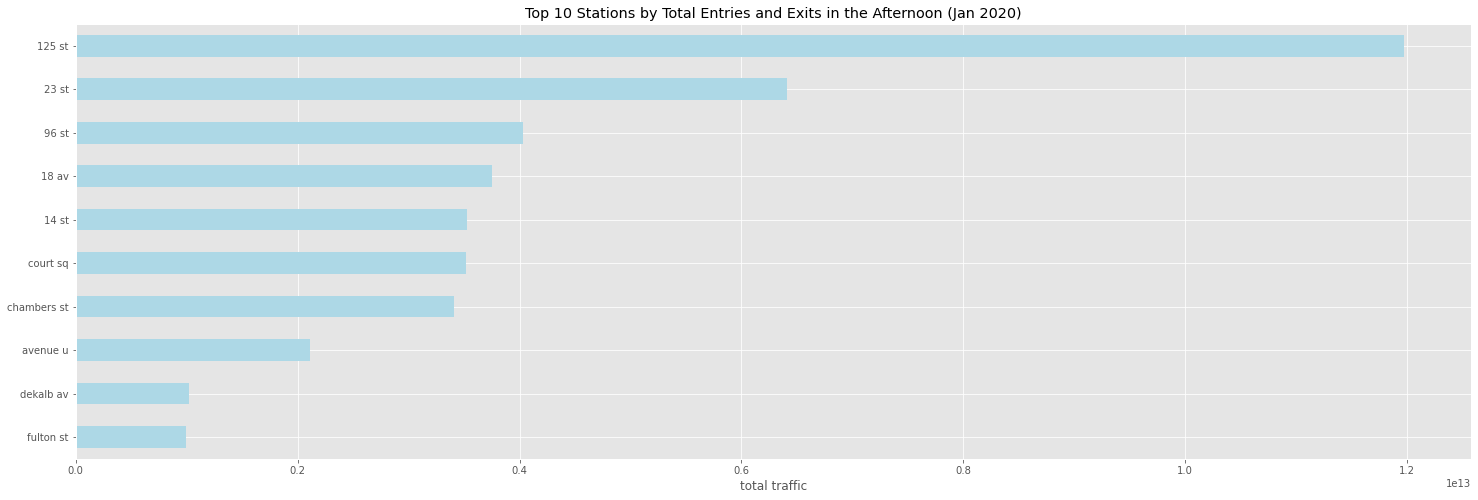

In [102]:
top_10_afternoon_2020 =mta_afternoon.groupby(['stopname']).agg({'diff_2020': sum}).sort_values(by='diff_2020', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(25, 8))
top_10_afternoon_2020.sort_values(by='diff_2020',ascending=True).plot(kind='barh', color ='lightblue',ax=ax)
ax.set(title='Top 10 Stations by Total Entries and Exits in the Afternoon (Jan 2020)', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)

In [103]:
pd.merge(top_10_morning_2020,top_10_afternoon_2020,on='stopname')

,diff_2020_x,diff_2020_y
stopname,,
125 st,12033646504256,11975949813056
23 st,6462207077400,6408852242940
96 st,4025018781120,4026959467712
18 av,3755478634776,3755628739197
14 st,3621243138912,3527474292720
court sq,3518025293997,3514848612237
chambers st,3428530007139,3405213687555
avenue u,2089935903339,2110936074849
dekalb av,1056262185072,1021743393720


In [98]:
pd.merge(top_10_morning_2019,top_10_afternoon_2019,on='stopname')

,diff_2019_x,diff_2019_y
stopname,,
125 st,9443328266176,9225755048064
14 st,5594985786816,5418068714976
96 st,4020817129856,4020735378560
court sq,3522985707294,3522993196365
18 av,2532623677002,2525241733497
7 av,2391581629530,2390111459064
chambers st,1431924555141,1401298148880
59 st,1198122165424,1201177303544
dekalb av,928539638248,919291188688


In [108]:
type(mta_125st.time)

pandas.core.series.Series

In [113]:
mta_125st = stationdf[stationdf.stopname=='125 st']
mta_125st['time'] = pd.to_datetime(mta_125st['time'], format = '%H:%M:%S')
mta_125st['diff'] = mta_125st.entries - mta_125st.exits
mta_125st_grouped = mta_125st.groupby(['time']).agg({'diff': sum}).sort_values(by='diff', ascending = False)
mta_125st_grouped.resample('60T',convention='end').sum().sort_values(by='diff', ascending = False).head()

,diff
time,
1900-01-01 08:00:00,152117458024
1900-01-01 16:00:00,150316038020
1900-01-01 04:00:00,146710250960
1900-01-01 20:00:00,146649647172
1900-01-01 00:00:00,146648995312


In [118]:
mta_125st.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry,hour,diff
76634,125 st,ACBD,12/29/2018,1900-01-01 03:00:00,5783749,4664266,2018-12-29 03:00:00,N025-R102-01-00-00,M,40.811109,-73.952343,POINT (-73.95234 40.81111),3,1119483
76635,125 st,ACBD,12/29/2018,1900-01-01 03:00:00,5783749,4664266,2018-12-29 03:00:00,N025-R102-01-00-00,M,40.815581,-73.958372,POINT (-73.95837 40.81558),3,1119483
76636,125 st,ACBD,12/29/2018,1900-01-01 03:00:00,5783749,4664266,2018-12-29 03:00:00,N025-R102-01-00-00,M,40.804138,-73.937594,POINT (-73.93759 40.80414),3,1119483
76637,125 st,ACBD,12/29/2018,1900-01-01 03:00:00,5783749,4664266,2018-12-29 03:00:00,N025-R102-01-00-00,M,40.807754,-73.945495,POINT (-73.94549 40.80775),3,1119483
76638,125 st,ACBD,12/29/2018,1900-01-01 07:00:00,5783749,4664302,2018-12-29 07:00:00,N025-R102-01-00-00,M,40.811109,-73.952343,POINT (-73.95234 40.81111),7,1119447


In [ ]:
sta125st = mta_125st[['stopname', 'date', 'entries_diff','exits_diff','busy']]
stations_day_time_group = stations_day_time.groupby(['Station','datetime'], as_index=False)
stations_day_time = stations_day_time_group[['entries_diff', 'exits_diff','busy']].sum()
rounded_day_time = stations_day_time.set_index('datetime').groupby(['Station'])
rounded_day_time = rounded_day_time.resample(time_interval, convention='end').sum()

print ('Station of interest: ' + station_of_interest)
print ('Sample size before resampling:')
print (len(stations_day_time[stations_day_time.Station == station_of_interest]))
print ('Sample size after resampling:')
print (len(rounded_day_time.loc[station_of_interest]))
rounded_day_time = rounded_day_time.reset_index()

In [145]:
# group data by turnstile, sort each turnstile by datetime
# Create new columns en_diff and ex_diff for each unique turnstile
# turn cumulative counts into counts per interval

mta_sorted = turnstiles.sort_values(['turnstile', 'datetime'])
mta_sorted = mta_sorted.reset_index(drop = True)

turnstile_grouped = mta_sorted.groupby(['turnstile'])

mta_sorted['entries_diff'] = turnstile_grouped['entries'].transform(pd.Series.diff)
mta_sorted['exits_diff'] = turnstile_grouped['exits'].transform(pd.Series.diff)

mta_sorted.head()

,C/A,unit,SCP,Station,linename,division,date,time,desc,entries,exits,datetime,turnstile,stopname,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,03:00:00,REGULAR,6889287,2335920,2018-12-29 03:00:00,A002-R051-02-00-00,59 st,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,07:00:00,REGULAR,6889299,2335936,2018-12-29 07:00:00,A002-R051-02-00-00,59 st,12.0,16.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,11:00:00,REGULAR,6889364,2336038,2018-12-29 11:00:00,A002-R051-02-00-00,59 st,65.0,102.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,15:00:00,REGULAR,6889605,2336101,2018-12-29 15:00:00,A002-R051-02-00-00,59 st,241.0,63.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/29/2018,19:00:00,REGULAR,6889966,2336173,2018-12-29 19:00:00,A002-R051-02-00-00,59 st,361.0,72.0


In [146]:
mta_sorted['entries_diff'] = mta_sorted['entries_diff'].fillna(0)
mta_sorted['exits_diff'] = mta_sorted['exits_diff'].fillna(0)

mta_sorted['entries_diff'][mta_sorted['entries_diff'] < 0] = 0 
mta_sorted['exits_diff'][mta_sorted['exits_diff'] < 0] = 0 

mta_sorted['entries_diff'][mta_sorted['entries_diff'] >= 6000] = 0 
mta_sorted['exits_diff'][mta_sorted['exits_diff'] >= 6000] = 0

In [147]:
mta_h1 = mta_sorted[['turnstile','Station', 'datetime','date','time', 'entries_diff','exits_diff']]
mta_h1['busy'] = mta_h1['entries_diff'].values + mta_h1['exits_diff'].values

mta_h1.shape

(809019, 8)

In [148]:
mta_125st = mta_h1[mta_h1['Station'] == '125 ST'].groupby(by = 'date').agg({'busy' : sum}).reset_index()
mta_125st['date'] = pd.to_datetime(mta_125st['date'])
mta_125st['month'] = mta_125st['date'].dt.month
mta_125st_mon = mta_125st[['month', 'busy']].groupby('month')
mta_125st_mon.head()
#penn_mean = penn_month.mean()

,month,busy
0,1,63402.0
1,1,118625.0
2,1,129040.0
3,1,132727.0
4,1,79677.0
25,12,79471.0
26,12,79637.0
27,12,96870.0


In [149]:
station_of_interest = '125 ST'
mta_125 = mta_h1[mta_h1['Station'] == station_of_interest]
time_interval = '4H'

mta_125.head()

,turnstile,Station,datetime,date,time,entries_diff,exits_diff,busy
180234,N025-R102-01-00-00,125 ST,2018-12-29 03:00:00,12/29/2018,03:00:00,0.0,0.0,0.0
180235,N025-R102-01-00-00,125 ST,2018-12-29 07:00:00,12/29/2018,07:00:00,0.0,36.0,36.0
180236,N025-R102-01-00-00,125 ST,2018-12-29 11:00:00,12/29/2018,11:00:00,116.0,81.0,197.0
180237,N025-R102-01-00-00,125 ST,2018-12-29 15:00:00,12/29/2018,15:00:00,190.0,151.0,341.0
180238,N025-R102-01-00-00,125 ST,2018-12-29 19:00:00,12/29/2018,19:00:00,202.0,203.0,405.0


In [160]:
stations_day_time = mta_125[['Station', 'datetime', 'entries_diff','exits_diff','busy']]
stations_day_time_group = stations_day_time.groupby(['Station','datetime'], as_index=False)
stations_day_time = stations_day_time_group[['entries_diff', 'exits_diff','busy']].sum()
rounded_day_time = stations_day_time.set_index('datetime').groupby(['Station'])
rounded_day_time = rounded_day_time.resample(time_interval, convention='end').sum()

print ('Station of interest: ' + station_of_interest)
print ('Sample size before resampling:')
print (len(stations_day_time[stations_day_time.Station == station_of_interest]))
print ('Sample size after resampling:')
print (len(rounded_day_time.loc[station_of_interest]))
rounded_day_time = rounded_day_time.reset_index()

Station of interest: 125 ST
Sample size before resampling:
365
Sample size after resampling:
168


In [162]:
stations_day_time = rounded_day_time
stations_day_time['DAY'] = stations_day_time['datetime'].dt.dayofweek
stations_day_time['TIME'] = stations_day_time['datetime'].dt.time
stations_day_time_group = stations_day_time.groupby(['Station','DAY','TIME'])
stations_day_time_group = stations_day_time_group['entries_diff'].mean().reset_index()
stations_day_time_group.head(6)

,Station,DAY,TIME,entries_diff
0,125 ST,0,00:00:00,3005.25
1,125 ST,0,04:00:00,1904.75
2,125 ST,0,08:00:00,11402.50
3,125 ST,0,12:00:00,12317.50
4,125 ST,0,16:00:00,15752.25
5,125 ST,0,20:00:00,12605.75


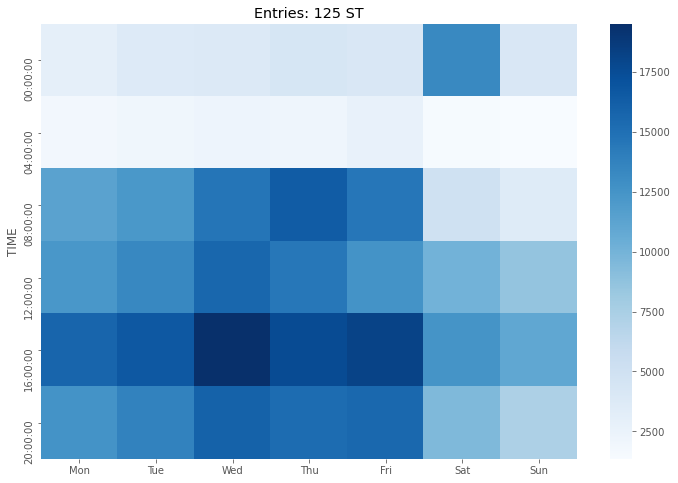

In [163]:
draw_station = stations_day_time_group

station_heatmap = draw_station.set_index(['DAY', 'TIME']).entries_diff.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Entries: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
plt.show()

In [164]:
stations_day_time_group = stations_day_time.groupby(['Station','DAY','TIME'])
stations_day_time_group = stations_day_time_group['exits_diff'].mean().reset_index()
stations_day_time_group.head(6)

,Station,DAY,TIME,exits_diff
0,125 ST,0,00:00:00,3361.25
1,125 ST,0,04:00:00,1913.50
2,125 ST,0,08:00:00,9378.25
3,125 ST,0,12:00:00,9583.50
4,125 ST,0,16:00:00,12740.25
5,125 ST,0,20:00:00,9713.75


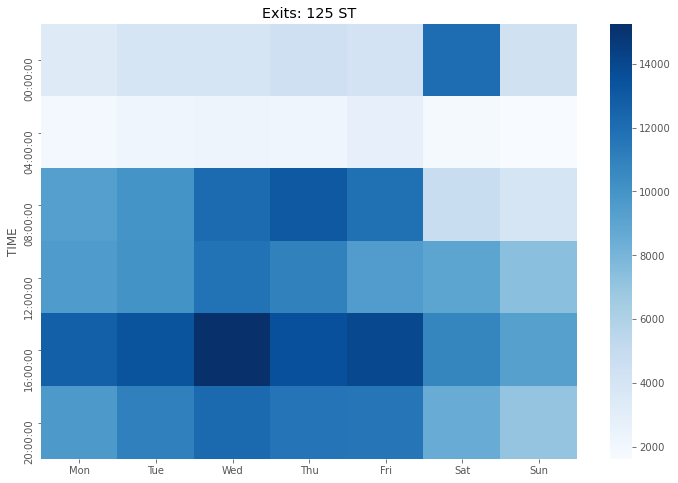

In [165]:
draw_station = stations_day_time_group

station_heatmap = draw_station.set_index(['DAY', 'TIME']).exits_diff.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Exits: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
plt.show()

# Later is not for this capstone project

In [6]:
df6 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190330.txt')

In [7]:
df7 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190406.txt')

In [8]:
df1 = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_200314.txt")

In [9]:
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200321.txt')

In [10]:
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200328.txt')

In [11]:
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200404.txt')

In [12]:
df5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200411.txt')

In [13]:
turnstiles = pd.concat([df1, df2, df3, df4, df5, df6, df7])

In [14]:
turnstiles.shape

(1435678, 11)

In [15]:
turnstiles.describe()

,ENTRIES,EXITS
count,1.435678e+06,1.435678e+06
mean,4.259073e+07,3.490526e+07
std,2.175111e+08,1.981686e+08
min,0.000000e+00,0.000000e+00
25%,3.236242e+05,1.424392e+05
50%,1.954915e+06,1.150970e+06
75%,6.580003e+06,4.497084e+06
max,2.129408e+09,2.124214e+09


In [16]:
turnstiles

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/07/2020,03:00:00,REGULAR,7402469,2511926
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/07/2020,07:00:00,REGULAR,7402480,2511937
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/07/2020,11:00:00,REGULAR,7402559,2512022
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/07/2020,15:00:00,REGULAR,7402755,2512073
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/07/2020,19:00:00,REGULAR,7403040,2512132
...,...,...,...,...,...,...,...,...,...,...,...
202959,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/05/2019,05:00:00,REGULAR,5554,374
202960,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/05/2019,09:00:00,REGULAR,5554,374
202961,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/05/2019,13:00:00,REGULAR,5554,374
202962,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/05/2019,17:00:00,REGULAR,5554,374


In [17]:
complexes = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

In [18]:
complexes

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Notes
0,1,1,R01,BMT,Astoria,Astoria-Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,0,NaN
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,1,NaN
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,0,NaN
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,0,NaN
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,517,517,S15,SIR,Staten Island,Prince's Bay,SI,SIR,Open Cut,40.525507,-74.200064,St George,Tottenville,0,NaN
492,518,518,S14,SIR,Staten Island,Pleasant Plains,SI,SIR,Embankment,40.522410,-74.217847,St George,Tottenville,0,NaN
493,519,519,S13,SIR,Staten Island,Richmond Valley,SI,SIR,Open Cut,40.519631,-74.229141,St George,Tottenville,0,NaN
494,522,522,S09,SIR,Staten Island,Tottenville,SI,SIR,At Grade,40.512764,-74.251961,St George,NaN,1,NaN


In [19]:
#new = pd.merge(turnstiles, complexes, 
#               left_on = turnstiles['UNIT'],
#               right_on = complexes['GTFS Stop ID'] ,
#               how = 'left')

In [20]:
#new['Complex ID']

In [21]:
turnstiles.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [22]:
mta = turnstiles[['C/A','UNIT','SCP','STATION','DATE','TIME','DESC','ENTRIES','EXITS                                                               ','LINENAME','DIVISION']]
mta.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,LINENAME,DIVISION
0,A002,R051,02-00-00,59 ST,03/07/2020,03:00:00,REGULAR,7402469,2511926,NQR456W,BMT
1,A002,R051,02-00-00,59 ST,03/07/2020,07:00:00,REGULAR,7402480,2511937,NQR456W,BMT
2,A002,R051,02-00-00,59 ST,03/07/2020,11:00:00,REGULAR,7402559,2512022,NQR456W,BMT
3,A002,R051,02-00-00,59 ST,03/07/2020,15:00:00,REGULAR,7402755,2512073,NQR456W,BMT
4,A002,R051,02-00-00,59 ST,03/07/2020,19:00:00,REGULAR,7403040,2512132,NQR456W,BMT


In [23]:
mta.columns =['C/A','unit','SCP','Station','date','time','desc','entries','exits','linename','division']  

In [24]:
mta.head()

,C/A,unit,SCP,Station,date,time,desc,entries,exits,linename,division
0,A002,R051,02-00-00,59 ST,03/07/2020,03:00:00,REGULAR,7402469,2511926,NQR456W,BMT
1,A002,R051,02-00-00,59 ST,03/07/2020,07:00:00,REGULAR,7402480,2511937,NQR456W,BMT
2,A002,R051,02-00-00,59 ST,03/07/2020,11:00:00,REGULAR,7402559,2512022,NQR456W,BMT
3,A002,R051,02-00-00,59 ST,03/07/2020,15:00:00,REGULAR,7402755,2512073,NQR456W,BMT
4,A002,R051,02-00-00,59 ST,03/07/2020,19:00:00,REGULAR,7403040,2512132,NQR456W,BMT


In [25]:
#create new cols for datetime and unique turnstile identifier
mta['datetime'] = pd.to_datetime(mta.date + ' ' + mta.time, format='%m/%d/%Y  %H:%M:%S')
mta['turnstile'] = mta['C/A'] + '-' + mta['unit'] + '-' + mta['SCP']


In [26]:
mta.head()

,C/A,unit,SCP,Station,date,time,desc,entries,exits,linename,division,datetime,turnstile
0,A002,R051,02-00-00,59 ST,03/07/2020,03:00:00,REGULAR,7402469,2511926,NQR456W,BMT,2020-03-07 03:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,03/07/2020,07:00:00,REGULAR,7402480,2511937,NQR456W,BMT,2020-03-07 07:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,03/07/2020,11:00:00,REGULAR,7402559,2512022,NQR456W,BMT,2020-03-07 11:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,03/07/2020,15:00:00,REGULAR,7402755,2512073,NQR456W,BMT,2020-03-07 15:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,03/07/2020,19:00:00,REGULAR,7403040,2512132,NQR456W,BMT,2020-03-07 19:00:00,A002-R051-02-00-00


In [27]:
print('Descriptions of entries:')
print(mta['entries'].describe())
print('')
print('Descriptions of exits:')
print(mta['exits'].describe())

Descriptions of entries:
count    1.435678e+06
mean     4.259073e+07
std      2.175111e+08
min      0.000000e+00
25%      3.236242e+05
50%      1.954915e+06
75%      6.580003e+06
max      2.129408e+09
Name: entries, dtype: float64

Descriptions of exits:
count    1.435678e+06
mean     3.490526e+07
std      1.981686e+08
min      0.000000e+00
25%      1.424392e+05
50%      1.150970e+06
75%      4.497084e+06
max      2.124214e+09
Name: exits, dtype: float64


In [28]:
# group data by turnstile, sort each turnstile by datetime
# Create new columns en_diff and ex_diff for each unique turnstile
# turn cumulative counts into counts per interval

mta_sorted = mta.sort_values(['turnstile', 'datetime'])
mta_sorted = mta_sorted.reset_index(drop = True)

turnstile_grouped = mta_sorted.groupby(['turnstile'])

mta_sorted['entries_diff'] = turnstile_grouped['entries'].transform(pd.Series.diff)
mta_sorted['exits_diff'] = turnstile_grouped['exits'].transform(pd.Series.diff)

mta_sorted.head()

,C/A,unit,SCP,Station,date,time,desc,entries,exits,linename,division,datetime,turnstile,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,03/23/2019,00:00:00,REGULAR,6989774,2370411,NQR456W,BMT,2019-03-23 00:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/23/2019,04:00:00,REGULAR,6989795,2370413,NQR456W,BMT,2019-03-23 04:00:00,A002-R051-02-00-00,21.0,2.0
2,A002,R051,02-00-00,59 ST,03/23/2019,08:00:00,REGULAR,6989813,2370436,NQR456W,BMT,2019-03-23 08:00:00,A002-R051-02-00-00,18.0,23.0
3,A002,R051,02-00-00,59 ST,03/23/2019,12:00:00,REGULAR,6989924,2370512,NQR456W,BMT,2019-03-23 12:00:00,A002-R051-02-00-00,111.0,76.0
4,A002,R051,02-00-00,59 ST,03/23/2019,16:00:00,REGULAR,6990200,2370573,NQR456W,BMT,2019-03-23 16:00:00,A002-R051-02-00-00,276.0,61.0


In [29]:
# check distribution of entries_diff and exits_diff
print('Descriptions of entries_diff:')
print(mta_sorted['entries_diff'].describe())
print('')
print('Descriptions of exits_diff:')
print(mta_sorted['exits_diff'].describe())

Descriptions of entries_diff:
count    1.430682e+06
mean     1.048125e+04
std      8.143602e+06
min     -2.129276e+09
25%      2.000000e+00
50%      1.800000e+01
75%      8.100000e+01
max      2.055857e+09
Name: entries_diff, dtype: float64

Descriptions of exits_diff:
count    1.430682e+06
mean     9.473561e+03
std      7.135596e+06
min     -2.048166e+09
25%      3.000000e+00
50%      1.600000e+01
75%      6.500000e+01
max      2.036819e+09
Name: exits_diff, dtype: float64


In [30]:
print('Total rows: %d' %len(mta_sorted))
print('Number of negative entries_diff: %d' %len(mta_sorted['entries_diff'][mta_sorted['entries_diff'] < 0]))
print('Number of negative exits_diff: %d' %len(mta_sorted['exits_diff'][mta_sorted['exits_diff'] < 0]))
print('Number of unqiue turnstiles: %d' %len(mta_sorted['turnstile'].unique()))
print('Number of NaN rows: %d' %len(mta_sorted[mta_sorted['entries_diff'].isnull()]))

Total rows: 1435678
Number of negative entries_diff: 13005
Number of negative exits_diff: 10668
Number of unqiue turnstiles: 4996
Number of NaN rows: 4996


In [31]:

mta_sorted['entries_diff'] = mta_sorted['entries_diff'].fillna(0)
mta_sorted['exits_diff'] = mta_sorted['exits_diff'].fillna(0)

mta_sorted['entries_diff'][mta_sorted['entries_diff'] < 0] = 0 
mta_sorted['exits_diff'][mta_sorted['exits_diff'] < 0] = 0 

mta_sorted['entries_diff'][mta_sorted['entries_diff'] >= 6000] = 0 
mta_sorted['exits_diff'][mta_sorted['exits_diff'] >= 6000] = 0

In [32]:
mta_sorted

,C/A,unit,SCP,Station,date,time,desc,entries,exits,linename,division,datetime,turnstile,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,03/23/2019,00:00:00,REGULAR,6989774,2370411,NQR456W,BMT,2019-03-23 00:00:00,A002-R051-02-00-00,0.0,0.0
1,A002,R051,02-00-00,59 ST,03/23/2019,04:00:00,REGULAR,6989795,2370413,NQR456W,BMT,2019-03-23 04:00:00,A002-R051-02-00-00,21.0,2.0
2,A002,R051,02-00-00,59 ST,03/23/2019,08:00:00,REGULAR,6989813,2370436,NQR456W,BMT,2019-03-23 08:00:00,A002-R051-02-00-00,18.0,23.0
3,A002,R051,02-00-00,59 ST,03/23/2019,12:00:00,REGULAR,6989924,2370512,NQR456W,BMT,2019-03-23 12:00:00,A002-R051-02-00-00,111.0,76.0
4,A002,R051,02-00-00,59 ST,03/23/2019,16:00:00,REGULAR,6990200,2370573,NQR456W,BMT,2019-03-23 16:00:00,A002-R051-02-00-00,276.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435673,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/10/2020,05:00:00,REGULAR,5554,514,R,RIT,2020-04-10 05:00:00,TRAM2-R469-00-05-01,0.0,0.0
1435674,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/10/2020,09:00:00,REGULAR,5554,514,R,RIT,2020-04-10 09:00:00,TRAM2-R469-00-05-01,0.0,0.0
1435675,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/10/2020,13:00:00,REGULAR,5554,514,R,RIT,2020-04-10 13:00:00,TRAM2-R469-00-05-01,0.0,0.0
1435676,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/10/2020,17:00:00,REGULAR,5554,514,R,RIT,2020-04-10 17:00:00,TRAM2-R469-00-05-01,0.0,0.0


In [33]:
##Find busiest stations

In [34]:
mta_h1 = mta_sorted[['turnstile','Station', 'datetime','date','time', 'entries_diff','exits_diff']]
mta_h1['busy'] = mta_h1['entries_diff'].values + mta_h1['exits_diff'].values

mta_h1.shape

(1435678, 8)

In [35]:
mta_h1.head()

,turnstile,Station,datetime,date,time,entries_diff,exits_diff,busy
0,A002-R051-02-00-00,59 ST,2019-03-23 00:00:00,03/23/2019,00:00:00,0.0,0.0,0.0
1,A002-R051-02-00-00,59 ST,2019-03-23 04:00:00,03/23/2019,04:00:00,21.0,2.0,23.0
2,A002-R051-02-00-00,59 ST,2019-03-23 08:00:00,03/23/2019,08:00:00,18.0,23.0,41.0
3,A002-R051-02-00-00,59 ST,2019-03-23 12:00:00,03/23/2019,12:00:00,111.0,76.0,187.0
4,A002-R051-02-00-00,59 ST,2019-03-23 16:00:00,03/23/2019,16:00:00,276.0,61.0,337.0


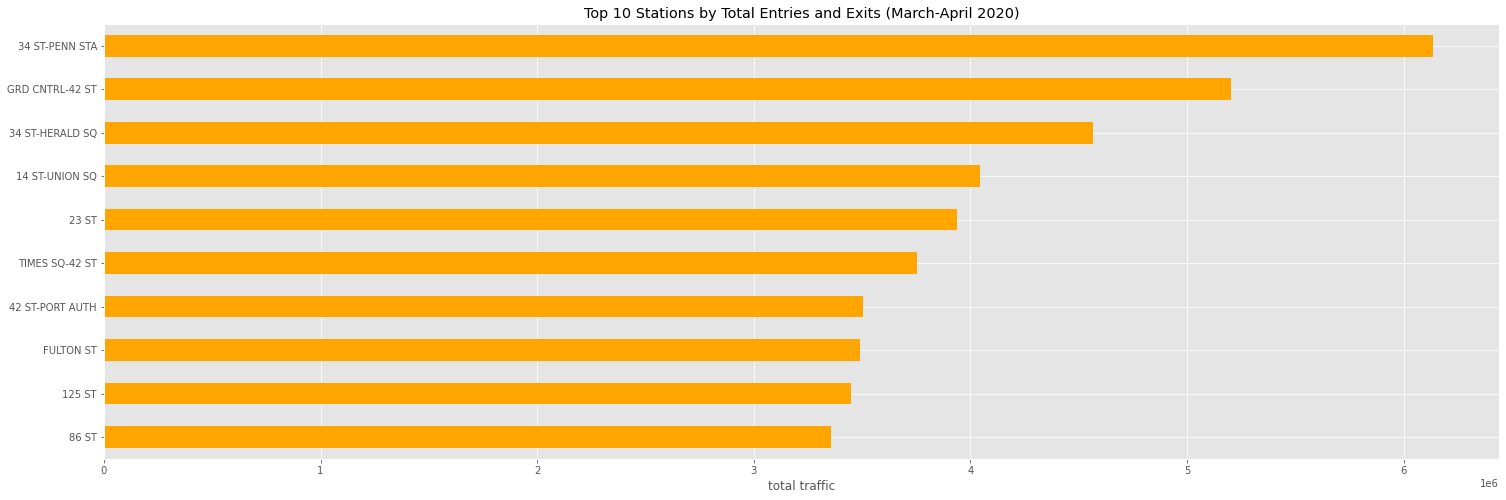

In [36]:
#10 busiest stations
top_10 =mta_h1.groupby(['Station']).agg({'busy': sum}).sort_values(by = 'busy', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(25, 8))
top_10.sort_values(by = 'busy',ascending=True).plot(kind='barh', color ='orange',ax=ax)
ax.set(title='Top 10 Stations by Total Entries and Exits (March-April 2020)', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)

In [37]:
mta_penn = mta_h1[mta_h1['Station'] == '34 ST-PENN STA']
print('Number of turnstiles at 34-PENN STATION: %d' % len(mta_penn.turnstile.unique()))

Number of turnstiles at 34-PENN STATION: 100


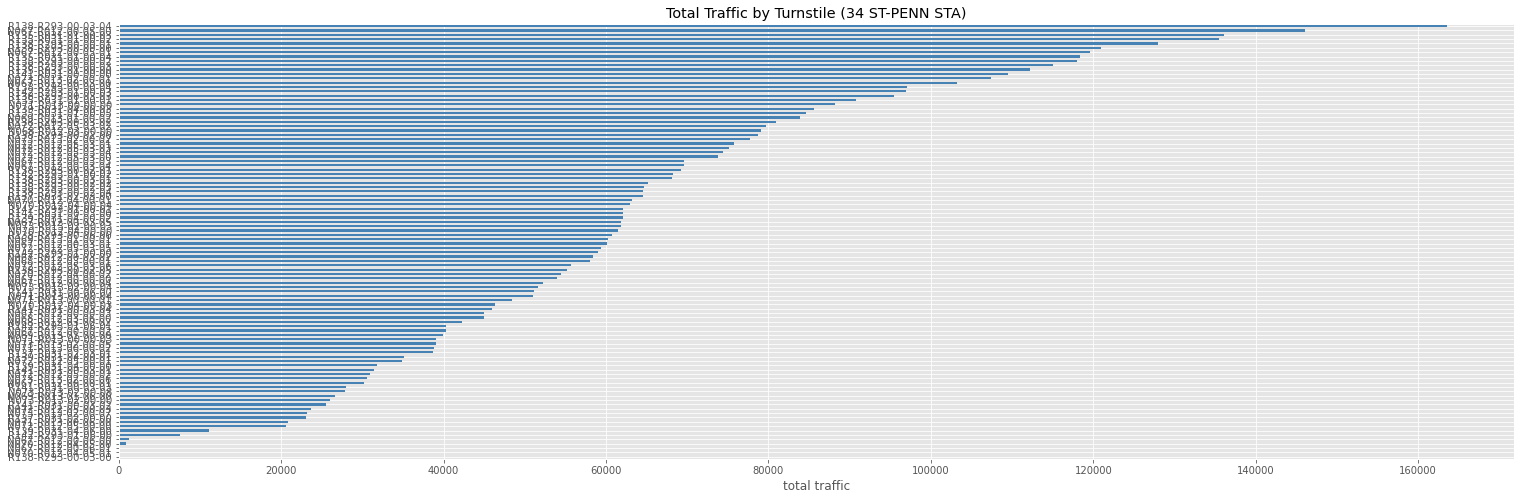

In [38]:
penn_turnstile =mta_penn.groupby(['turnstile']).agg({'busy': sum}).sort_values(by = 'busy', ascending = False)

fig, ax = plt.subplots(figsize=(25, 8))
penn_turnstile.sort_values(by = 'busy',ascending=True).plot(kind='barh', color ='steelblue',ax=ax)
ax.set(title='Total Traffic by Turnstile (34 ST-PENN STA)', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)

In [39]:
mta_penn = mta_h1[(mta_h1['Station'] == '34 ST-PENN STA')]
mta_penn['time'] = pd.to_datetime(mta_penn['time'], format = '%H:%M:%S') # have to be datetime format so that we could resample
mta_penn_grouped = mta_penn.groupby(['time']).agg({'busy': sum}).sort_values(by = 'busy', ascending = False)
mta_penn_grouped.resample('60T',convention='end').sum().sort_values(by = 'busy', ascending = False).head()

,busy
time,
1900-01-01 20:00:00,1382015.0
1900-01-01 12:00:00,1044930.0
1900-01-01 16:00:00,858659.0
1900-01-01 08:00:00,501256.0
1900-01-01 18:00:00,480283.0


In [40]:

mta_h1busy = mta_h1[['date', 'busy']].groupby(['date']).sum().reset_index()
mta_h1busy['date'] = pd.to_datetime(mta_h1busy['date'])

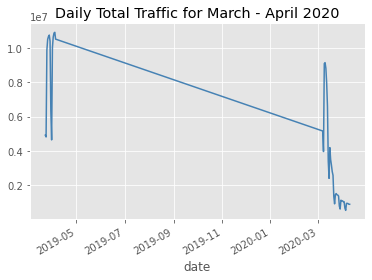

In [41]:
mta_h1busy.set_index('date')['busy'].plot(color = 'steelblue')
plt.title('Daily Total Traffic for March - April 2020') 
plt.show()

In [42]:
import datetime

In [43]:
mta_h1['weekday'] = (mta_h1['datetime']).dt.day_name()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mta_h1['weekday'] = pd.Categorical(mta_h1['weekday'], categories=weekdays, ordered = True)

In [44]:
weekday_ave = mta_h1[['entries_diff', 'exits_diff', 'busy', 'weekday']].groupby('weekday').sum().reset_index().sort_values(by = 'weekday')
weekday_ave['emgergency'] = (weekday_ave['entries_diff'] - weekday_ave['exits_diff'])/weekday_ave['busy']

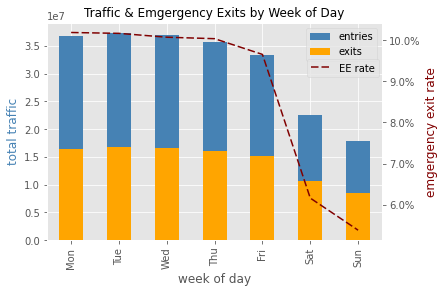

In [45]:

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

p1 = weekday_ave['busy'].plot(kind='bar', color='steelblue', ax=ax1, label = 'entries')
p1.legend(loc = 1)
p2 = weekday_ave['exits_diff'].plot(kind='bar', color='orange', ax=ax1, label = 'exits')
p2.legend(loc = 1)
p3 = weekday_ave['emgergency'].plot(kind='line', dashes = [5, 2], color='maroon', ax=ax2, label = 'EE rate')
p3.legend(loc = (0.775, 0.75)) 

plt.xticks((0,1,2,3,4,5,6),('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'))
ax1.set_xlabel('week of day')
ax1.set_ylabel('total traffic', color='steelblue')

ax2.set_ylabel('emgergency exit rate', color='maroon')
ax2.grid(False)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y))) 
plt.title('Traffic & Emgergency Exits by Week of Day', size = 12) 
plt.show()

In [46]:
mta_penn = mta_h1[mta_h1['Station'] == '34 ST-PENN STA'].groupby(by = 'date').agg({'busy' : sum}).reset_index()
mta_penn['date'] = pd.to_datetime(mta_penn['date'])
mta_penn['month'] = mta_penn['date'].dt.month
penn_month = mta_penn[['month', 'busy']].groupby('month')
penn_mean = penn_month.mean()

In [47]:
#Traffic heat map of Penn station
station_of_interest = '34 ST-PENN STA'
mta_penn = mta_h1[mta_h1['Station'] == station_of_interest]
time_interval = '4H'

mta_penn.head()

,turnstile,Station,datetime,date,time,entries_diff,exits_diff,busy,weekday
370489,N067-R012-00-00-00,34 ST-PENN STA,2019-03-23 00:00:00,03/23/2019,00:00:00,0.0,0.0,0.0,Saturday
370490,N067-R012-00-00-00,34 ST-PENN STA,2019-03-23 04:00:00,03/23/2019,04:00:00,0.0,2.0,2.0,Saturday
370491,N067-R012-00-00-00,34 ST-PENN STA,2019-03-23 08:00:00,03/23/2019,08:00:00,11.0,111.0,122.0,Saturday
370492,N067-R012-00-00-00,34 ST-PENN STA,2019-03-23 12:00:00,03/23/2019,12:00:00,78.0,159.0,237.0,Saturday
370493,N067-R012-00-00-00,34 ST-PENN STA,2019-03-23 16:00:00,03/23/2019,16:00:00,133.0,241.0,374.0,Saturday


In [48]:
stations_day_time = mta_penn[['Station', 'datetime', 'entries_diff','exits_diff','busy']]
stations_day_time_group = stations_day_time.groupby(['Station','datetime'], as_index=False)
stations_day_time = stations_day_time_group[['entries_diff', 'exits_diff','busy']].sum()
rounded_day_time = stations_day_time.set_index('datetime').groupby(['Station'])
rounded_day_time = rounded_day_time.resample(time_interval, convention='end').sum()

print ('Station of interest: ' + station_of_interest)
print ('Sample size before resampling:')
print (len(stations_day_time[stations_day_time.Station == station_of_interest]))
print ('Sample size after resampling:')
print (len(rounded_day_time.loc[station_of_interest]))
rounded_day_time = rounded_day_time.reset_index()

Station of interest: 34 ST-PENN STA
Sample size before resampling:
600
Sample size after resampling:
2310


In [49]:
rounded_day_time.head()

,Station,datetime,entries_diff,exits_diff,busy
0,34 ST-PENN STA,2019-03-23 00:00:00,0.0,0.0,0.0
1,34 ST-PENN STA,2019-03-23 04:00:00,2421.0,2393.0,4814.0
2,34 ST-PENN STA,2019-03-23 08:00:00,5737.0,6912.0,12649.0
3,34 ST-PENN STA,2019-03-23 12:00:00,15433.0,18075.0,33508.0
4,34 ST-PENN STA,2019-03-23 16:00:00,22300.0,24316.0,46616.0


In [50]:
stations_day_time = rounded_day_time
stations_day_time['DAY'] = stations_day_time['datetime'].dt.dayofweek
stations_day_time['TIME'] = stations_day_time['datetime'].dt.time

In [51]:
stations_day_time_group = stations_day_time.groupby(['Station','DAY','TIME'])
stations_day_time_group = stations_day_time_group['entries_diff'].mean().reset_index()

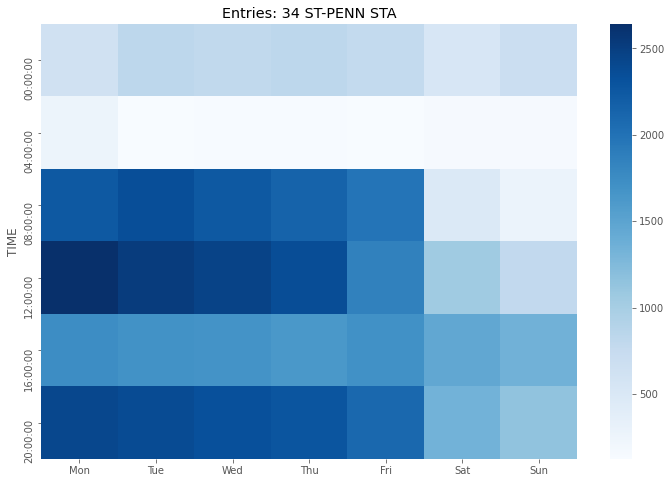

In [52]:
draw_station = stations_day_time_group

station_heatmap = draw_station.set_index(['DAY', 'TIME']).entries_diff.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Entries: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
plt.show()

In [53]:
#Repeat for Exits
stations_day_time_group = stations_day_time.groupby(['Station','DAY','TIME'])
stations_day_time_group = stations_day_time_group['exits_diff'].mean().reset_index()

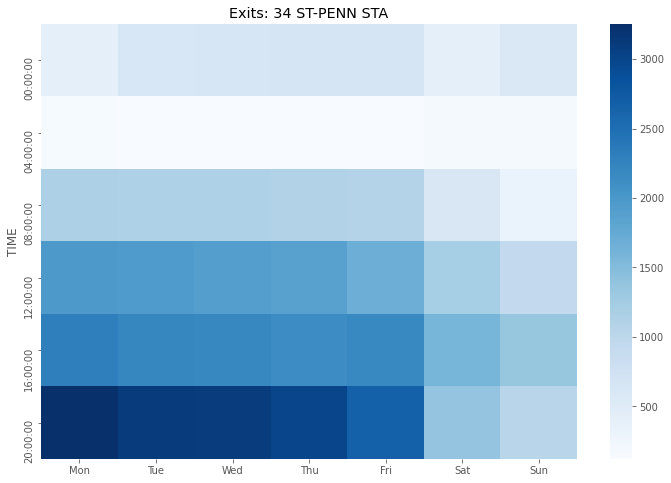

In [54]:
draw_station = stations_day_time_group

station_heatmap = draw_station.set_index(['DAY', 'TIME']).exits_diff.unstack(0)
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set(title='Exits: ' + station_of_interest , xlabel='', ylabel='Time')
sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
plt.show()

In [55]:
def Exit_Heatmap(data):
    stations_day_time_group = data.groupby(['Station','DAY','TIME'])
    stations_day_time_group = stations_day_time_group['exits_diff'].mean().reset_index()
    draw_station = stations_day_time_group

    station_heatmap = draw_station.set_index(['DAY', 'TIME']).exits_diff.unstack(0)
    weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
    station_heatmap.columns = [weekdays[c] for c in station_heatmap.columns]

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set(title='Exits: ' + station_of_interest , xlabel='', ylabel='Time')
    sns.heatmap(station_heatmap,ax=ax, cmap='Blues')
    plt.show()

In [56]:
stations_wk_1 = stations_day_time.loc[(stations_day_time['datetime']>='2020-03-09') & (stations_day_time['datetime'] <'2020-03-16')]
stations_wk_2 = stations_day_time.loc[(stations_day_time['datetime']>='2020-03-16') & (stations_day_time['datetime'] <'2020-03-23')]
stations_wk_3 = stations_day_time.loc[(stations_day_time['datetime']>='2020-03-23') & (stations_day_time['datetime'] <'2020-03-30')]

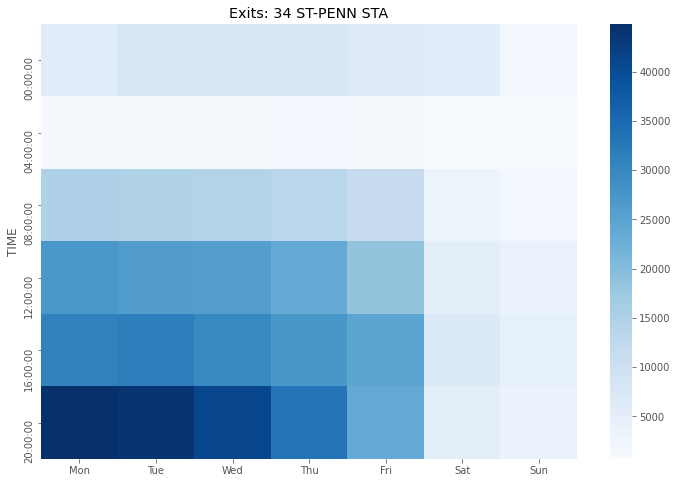

In [57]:
Exit_Heatmap(stations_wk_1)

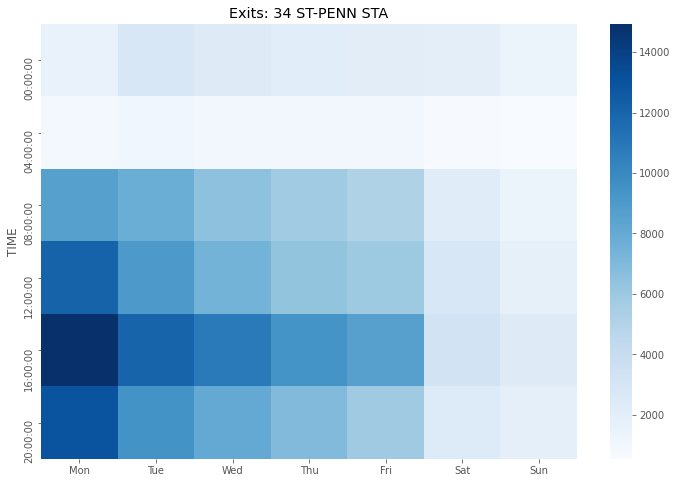

In [58]:
Exit_Heatmap(stations_wk_2)

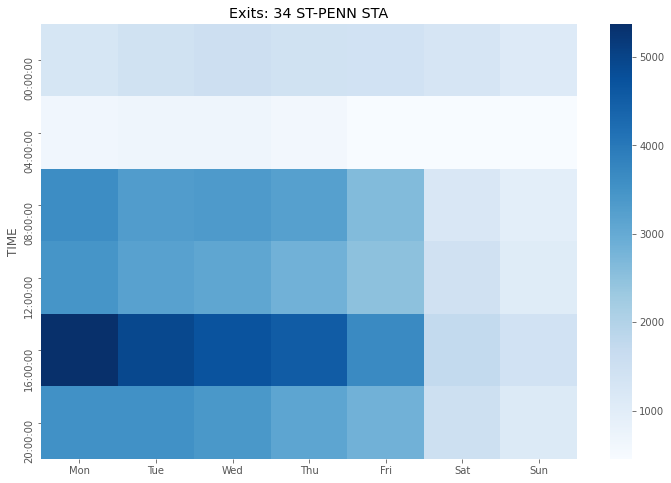

In [59]:
Exit_Heatmap(stations_wk_3)

In [60]:
pd.read_csv('ee_turnstile.csv')

,Unnamed: 0,station_name,equipment_id,description,borough,subway_lines,equipment_type,ada_compliant,is_active,clean_lines,remote
0,0,125 St,EL125,125 St & Lexington Ave (NE corner) to Mezzanin...,MN,4/5/6/METRO-NORTH,EL,Y,Y,4-5-6,['R132']
1,1,125 St,EL142,125 St & St Nicholas Ave (SW corner) to Mezzan...,MN,A/B/C/D,EL,Y,Y,A-B-C-D,['R102']
2,2,125 St,EL143,Mezzanine to downtown Platform,MN,A/B/C/D,EL,Y,Y,A-B-C-D,['R102']
3,3,125 St,EL126,Mezzanine to Platforms for service in both dir...,MN,4/5/6/METRO-NORTH,EL,Y,Y,4-5-6,['R132']
4,4,125 St,EL144,Mezzanine to uptown Platform,MN,A/B/C/D,EL,Y,Y,A-B-C-D,['R102']
...,...,...,...,...,...,...,...,...,...,...,...
607,607,WTC Cortlandt St,ES353,Mezzanine to Street,MN,1,ES,N,Y,1,['R305']
608,608,WTC Cortlandt St,EL13X,Oculus Main Level to PATH Level with access t...,MN,1,EL,Y,Y,1,['R305']
609,609,WTC Cortlandt St,EL736,Street to Southbound platform,MN,1,EL,Y,N,1,['R305']
610,610,WTC Cortlandt St,EL12X,West Concourse balcony to PATH Level with acce...,MN,1,EL,Y,Y,1,['R305']


In [61]:
xref = pd.read_csv('Master_crosswalk.csv')
xref.head()

,station_name,clean_lines,station_lines,el_station_name,el_lines,equipments,gtfs_station_name,gtfs_lines,turnstile_station_name,turnstile_lines,gtfs_stop_id,lat,lon,turnstile_units
0,Astor Pl,46,4-6-6 Express,NaN,NaN,NaN,Astor Pl,"4,6,6X",ASTOR PL,6,636,40.730054,-73.99107,R160
1,Canal St,46,4-6-6 Express,Canal St,6,"EL324,EL325",Canal St,"4,6,6X",CANAL ST,JNQRZ6W,639,40.718803,-74.00019300000001,"R118,R462,R463"
2,50th St,12,1-2,NaN,NaN,NaN,50 St,"1,2",50 ST,1,126,40.761728,-73.98384899999999,R116
3,Bergen St,234,2-3-4,NaN,NaN,NaN,Bergen St,"2,3,4",BERGEN ST,23,236,40.680829,-73.975098,R058
4,Pennsylvania Ave,34,3-4,NaN,NaN,NaN,Pennsylvania Av,"2,3,4,5",PENNSYLVANIA AV,3,255,40.664635,-73.89489499999999,R067


In [62]:
len(xref)

531

In [63]:
print(len(xref.station_name.unique()))
print(len(xref.gtfs_station_name.unique()))
print(len(xref.gtfs_stop_id.unique()))
print(len(xref.turnstile_units.unique()))
print(len(xref.turnstile_station_name.unique()))

355
357
476
426
371


In [64]:
#join mta df to this station one, then aggregate by station, then split into two dfs for 2019 mar23-apr and 2020.
#Then can calc % change.


In [65]:
mta_sorted

,C/A,unit,SCP,Station,date,time,desc,entries,exits,linename,division,datetime,turnstile,entries_diff,exits_diff
0,A002,R051,02-00-00,59 ST,03/23/2019,00:00:00,REGULAR,6989774,2370411,NQR456W,BMT,2019-03-23 00:00:00,A002-R051-02-00-00,0.0,0.0
1,A002,R051,02-00-00,59 ST,03/23/2019,04:00:00,REGULAR,6989795,2370413,NQR456W,BMT,2019-03-23 04:00:00,A002-R051-02-00-00,21.0,2.0
2,A002,R051,02-00-00,59 ST,03/23/2019,08:00:00,REGULAR,6989813,2370436,NQR456W,BMT,2019-03-23 08:00:00,A002-R051-02-00-00,18.0,23.0
3,A002,R051,02-00-00,59 ST,03/23/2019,12:00:00,REGULAR,6989924,2370512,NQR456W,BMT,2019-03-23 12:00:00,A002-R051-02-00-00,111.0,76.0
4,A002,R051,02-00-00,59 ST,03/23/2019,16:00:00,REGULAR,6990200,2370573,NQR456W,BMT,2019-03-23 16:00:00,A002-R051-02-00-00,276.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435673,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/10/2020,05:00:00,REGULAR,5554,514,R,RIT,2020-04-10 05:00:00,TRAM2-R469-00-05-01,0.0,0.0
1435674,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/10/2020,09:00:00,REGULAR,5554,514,R,RIT,2020-04-10 09:00:00,TRAM2-R469-00-05-01,0.0,0.0
1435675,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/10/2020,13:00:00,REGULAR,5554,514,R,RIT,2020-04-10 13:00:00,TRAM2-R469-00-05-01,0.0,0.0
1435676,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/10/2020,17:00:00,REGULAR,5554,514,R,RIT,2020-04-10 17:00:00,TRAM2-R469-00-05-01,0.0,0.0


In [66]:
#mta_sorted['Station'].unique()

In [67]:
#xref['turnstile_station_name'].unique()

In [68]:
#pd.merge(left, right, left_on='key1', right_on='key2')
mta_stations = pd.merge(mta_sorted, xref, left_on= 'Station', right_on = 'turnstile_station_name')

In [69]:
mta_stations.columns

Index(['C/A', 'unit', 'SCP', 'Station', 'date', 'time', 'desc', 'entries',
       'exits', 'linename', 'division', 'datetime', 'turnstile',
       'entries_diff', 'exits_diff', 'station_name', 'clean_lines',
       'station_lines', 'el_station_name', 'el_lines', 'equipments',
       'gtfs_station_name', 'gtfs_lines', 'turnstile_station_name',
       'turnstile_lines', 'gtfs_stop_id', 'lat', 'lon', 'turnstile_units'],
      dtype='object')

In [70]:
mta_stations = mta_stations[['Station', 'date', 'time', 'desc', 'linename', 'datetime', 'turnstile',
       'entries_diff', 'exits_diff', 'station_name', 'clean_lines',
       'station_lines', 'equipments', 'turnstile_station_name',
       'turnstile_lines', 'gtfs_stop_id', 'lat', 'lon', 'turnstile_units']]

In [71]:
mta_stations['DOW'] = mta_stations['datetime'].dt.weekday
mta_stations.head()

,Station,date,time,desc,linename,datetime,turnstile,entries_diff,exits_diff,station_name,clean_lines,station_lines,equipments,turnstile_station_name,turnstile_lines,gtfs_stop_id,lat,lon,turnstile_units,DOW
0,59 ST,03/23/2019,00:00:00,REGULAR,NQR456W,2019-03-23,A002-R051-02-00-00,0.0,0.0,Lexington Ave - 59th St,NRW,N-R-W,"ES249,ES248,ES215",59 ST,456NQRW,R11,40.762660,-73.967258,"R050,R051",5
1,59 ST,03/23/2019,00:00:00,REGULAR,NQR456W,2019-03-23,A002-R051-02-00-00,0.0,0.0,Lexington Ave - 59th St,NRW,N-R-W,"ES249,ES248,ES215",59 ST,NQR456W,R11,40.762660,-73.967258,"R050,R051",5
2,59 ST,03/23/2019,00:00:00,REGULAR,NQR456W,2019-03-23,A002-R051-02-00-00,0.0,0.0,Lexington Ave - 59th St,NRW,N-R-W,"ES249,ES248,ES215",59 ST,NRW,R11,40.762660,-73.967258,"R050,R051",5
3,59 ST,03/23/2019,00:00:00,REGULAR,NQR456W,2019-03-23,A002-R051-02-00-00,0.0,0.0,59th St,NR,N-R,NaN,59 ST,456NQRW,R41,40.641362,-74.017881,"R050,R051",5
4,59 ST,03/23/2019,00:00:00,REGULAR,NQR456W,2019-03-23,A002-R051-02-00-00,0.0,0.0,Lexington Ave - 59th St,456,4-5-6-6 Express,"ES213,ES211,ES214,ES212",59 ST,456NQRW,629,40.762526,-73.967967,"R050,R051",5


In [72]:
mta_stations['lat'] = pd.to_numeric(mta_stations['lat'], errors='coerce')
mta_stations['lon'] = pd.to_numeric(mta_stations['lon'], errors='coerce')


In [73]:
mta_stations['lat']= mta_stations['lat'].round(decimals=5)
mta_stations['lon']= mta_stations['lon'].round(decimals=5)


In [74]:
mta2020 = mta_stations.loc[(mta_stations['datetime']>='2020-03-23')&(mta_stations['datetime']<='2020-04-05')]
mta2019 = mta_stations.loc[(mta_stations['datetime']>='2019-03-25')&(mta_stations['datetime']<='2020-04-07')]

In [75]:
mta2020.columns

Index(['Station', 'date', 'time', 'desc', 'linename', 'datetime', 'turnstile',
       'entries_diff', 'exits_diff', 'station_name', 'clean_lines',
       'station_lines', 'equipments', 'turnstile_station_name',
       'turnstile_lines', 'gtfs_stop_id', 'lat', 'lon', 'turnstile_units',
       'DOW'],
      dtype='object')

In [76]:
mta2020agg = mta2020.groupby(['lat','lon'])['entries_diff','exits_diff'].sum()
#mta2020agg = mta2020.groupby('turnstile_station_name').agg({'entries_diff':'sum','exits_diff':'sum'})
mta2020agg.columns = ['entries2020','exits2020']
mta2020agg.head(10)

,,entries2020,exits2020
lat,lon,,
40.57613,-73.97594,4010.0,3229.0
40.57631,-73.96850,6747.0,4238.0
40.57742,-73.98123,71330.0,73814.0
40.57762,-73.96138,22399.0,19807.0
40.58090,-73.83559,2273.0,3686.0
40.58101,-73.97457,3446.0,1860.0
40.58321,-73.82756,354.0,923.0
40.58531,-73.82056,978.0,1375.0
40.58690,-73.95416,21918.0,23054.0


In [77]:
mta2019agg = mta2019.groupby(['lat','lon'])['entries_diff','exits_diff'].sum()
mta2019agg.columns = ['entries2019','exits2019']
mta2019agg.head()

,,entries2019,exits2019
lat,lon,,
40.57613,-73.97594,48907.0,34240.0
40.57631,-73.96850,71341.0,33788.0
40.57742,-73.98123,567678.0,544354.0
40.57762,-73.96138,269081.0,184366.0
40.58090,-73.83559,16160.0,20400.0


In [78]:
mtacompare = pd.concat([mta2020agg, mta2019agg],axis=1)

In [79]:
mtacompare

,,entries2020,exits2020,entries2019,exits2019
lat,lon,,,,
40.57613,-73.97594,4010.0,3229.0,48907.0,34240.0
40.57631,-73.96850,6747.0,4238.0,71341.0,33788.0
40.57742,-73.98123,71330.0,73814.0,567678.0,544354.0
40.57762,-73.96138,22399.0,19807.0,269081.0,184366.0
40.58090,-73.83559,2273.0,3686.0,16160.0,20400.0
...,...,...,...,...,...
40.88830,-73.83083,11157.0,15700.0,97306.0,112516.0
40.88925,-73.89858,13167.0,7683.0,153556.0,68162.0
40.89319,-73.85747,13765.0,7188.0,117461.0,42177.0


In [80]:
mtacompare['pct_change_entries'] = 100*(mtacompare['entries2020']-mtacompare['entries2019'])/mtacompare['entries2020']
mtacompare['pct_change_exits'] = 100*(mtacompare['exits2020']-mtacompare['exits2019'])/mtacompare['exits2020']

In [81]:
mtacompare.reset_index(drop=False, inplace=True)
mtacompare.head(10)

,lat,lon,entries2020,exits2020,entries2019,exits2019,pct_change_entries,pct_change_exits
0,40.57613,-73.97594,4010.0,3229.0,48907.0,34240.0,-1119.625935,-960.390214
1,40.57631,-73.96850,6747.0,4238.0,71341.0,33788.0,-957.373648,-697.262860
2,40.57742,-73.98123,71330.0,73814.0,567678.0,544354.0,-695.847470,-637.467147
3,40.57762,-73.96138,22399.0,19807.0,269081.0,184366.0,-1101.308094,-830.812339
4,40.58090,-73.83559,2273.0,3686.0,16160.0,20400.0,-610.954685,-453.445469
5,40.58101,-73.97457,3446.0,1860.0,32673.0,13965.0,-848.142774,-650.806452
6,40.58321,-73.82756,354.0,923.0,4603.0,6807.0,-1200.282486,-637.486457
7,40.58531,-73.82056,978.0,1375.0,9904.0,10955.0,-912.678937,-696.727273
8,40.58690,-73.95416,21918.0,23054.0,293337.0,272909.0,-1238.338352,-1083.781556
9,40.58803,-73.81364,1698.0,2468.0,16732.0,17642.0,-885.394582,-614.829822


In [82]:
most_change_entries =mtacompare.sort_values(by = 'pct_change_entries', ascending = True).head(15)
most_change_entries

,lat,lon,entries2020,exits2020,entries2019,exits2019,pct_change_entries,pct_change_exits
238,40.72433,-73.99770,3522.0,6187.0,218654.0,224277.0,-6108.233958,-3524.971715
99,40.67199,-73.96438,1446.0,2269.0,87749.0,85148.0,-5968.395574,-3652.666373
323,40.76017,-73.97522,8636.0,11646.0,417476.0,470637.0,-4734.136174,-3941.190108
230,40.71932,-74.00689,2369.0,2209.0,98909.0,63015.0,-4075.137189,-2752.648257
247,40.73033,-73.99263,7331.0,7247.0,305054.0,214808.0,-4061.151275,-2864.095488
425,40.85522,-73.92941,2693.0,3753.0,107416.0,124802.0,-3888.711474,-3225.393019
258,40.73734,-73.99679,1407.0,2699.0,54807.0,47878.0,-3795.309168,-1673.916265
240,40.72530,-73.99620,10263.0,22150.0,390575.0,539560.0,-3705.661113,-2335.936795
205,40.71067,-74.01103,17794.0,22446.0,667812.0,548930.0,-3653.017871,-2345.558229
242,40.72623,-74.00374,12059.0,10641.0,442031.0,274630.0,-3565.569284,-2480.866460


In [83]:
most_change_exits =mtacompare.sort_values(by = 'pct_change_exits', ascending = True).head(15)
most_change_exits

,lat,lon,entries2020,exits2020,entries2019,exits2019,pct_change_entries,pct_change_exits
323,40.76017,-73.97522,8636.0,11646.0,417476.0,470637.0,-4734.136174,-3941.190108
99,40.67199,-73.96438,1446.0,2269.0,87749.0,85148.0,-5968.395574,-3652.666373
238,40.72433,-73.99770,3522.0,6187.0,218654.0,224277.0,-6108.233958,-3524.971715
425,40.85522,-73.92941,2693.0,3753.0,107416.0,124802.0,-3888.711474,-3225.393019
333,40.76481,-73.97335,7899.0,6477.0,275426.0,204739.0,-3386.846436,-3061.015902
304,40.75382,-73.98196,6859.0,6685.0,227380.0,203509.0,-3215.060504,-2944.263276
319,40.75866,-73.98133,29047.0,35967.0,1010128.0,1083786.0,-3377.563948,-2913.278839
247,40.73033,-73.99263,7331.0,7247.0,305054.0,214808.0,-4061.151275,-2864.095488
230,40.71932,-74.00689,2369.0,2209.0,98909.0,63015.0,-4075.137189,-2752.648257
253,40.73342,-74.00291,7832.0,10511.0,278606.0,272041.0,-3457.277835,-2488.155266


In [84]:
least_change_entries =mtacompare.sort_values(by = 'pct_change_entries', ascending = False).head(15)
least_change_entries

,lat,lon,entries2020,exits2020,entries2019,exits2019,pct_change_entries,pct_change_exits
82,40.66404,-73.90057,10759.0,9922.0,71741.0,60924.0,-566.799888,-514.029430
369,40.80872,-73.90766,3934.0,5318.0,26779.0,31928.0,-580.706660,-500.376081
73,40.65873,-73.89923,14337.0,18914.0,101766.0,111028.0,-609.813769,-487.014910
4,40.58090,-73.83559,2273.0,3686.0,16160.0,20400.0,-610.954685,-453.445469
68,40.65057,-73.89948,11169.0,14265.0,79666.0,85963.0,-613.277823,-502.614791
92,40.66937,-73.90197,11816.0,16094.0,84668.0,76370.0,-616.553825,-374.524668
413,40.84443,-73.91468,17566.0,15806.0,126841.0,91151.0,-622.082432,-476.686069
13,40.59237,-73.78852,7233.0,6106.0,52265.0,39960.0,-622.590903,-554.438257
457,40.90313,-73.85062,16960.0,21384.0,122823.0,139277.0,-624.192217,-551.314067
26,40.60399,-73.75541,15482.0,19682.0,113046.0,125417.0,-630.176980,-537.216746


In [85]:
least_change_exits =mtacompare.sort_values(by = 'pct_change_exits', ascending = False).head(15)
least_change_exits

,lat,lon,entries2020,exits2020,entries2019,exits2019,pct_change_entries,pct_change_exits
446,40.87866,-73.83859,9861.0,4227.0,86996.0,19024.0,-782.222898,-350.059144
92,40.66937,-73.90197,11816.0,16094.0,84668.0,76370.0,-616.553825,-374.524668
451,40.88604,-73.87875,15962.0,8439.0,153649.0,44631.0,-862.592407,-428.865979
4,40.58090,-73.83559,2273.0,3686.0,16160.0,20400.0,-610.954685,-453.445469
102,40.67413,-73.88075,8863.0,8508.0,76914.0,48516.0,-767.809997,-470.239774
413,40.84443,-73.91468,17566.0,15806.0,126841.0,91151.0,-622.082432,-476.686069
379,40.81838,-73.92735,36247.0,38780.0,317291.0,225025.0,-775.357961,-480.260444
380,40.81841,-73.92672,36247.0,38780.0,317291.0,225025.0,-775.357961,-480.260444
426,40.85609,-73.90074,8307.0,9567.0,78048.0,55982.0,-839.544962,-485.157312
455,40.89319,-73.85747,13765.0,7188.0,117461.0,42177.0,-753.330912,-486.769616


In [86]:
geometry = [Point(xy) for xy in zip(mtacompare.lon, mtacompare.lat)]
#df = df.drop(['Lon', 'Lat'], axis=1)
mtaGeo = GeoDataFrame(mtacompare, crs="EPSG:4326", geometry=geometry)


Text(0.5, 1.0, 'Exits %Change')

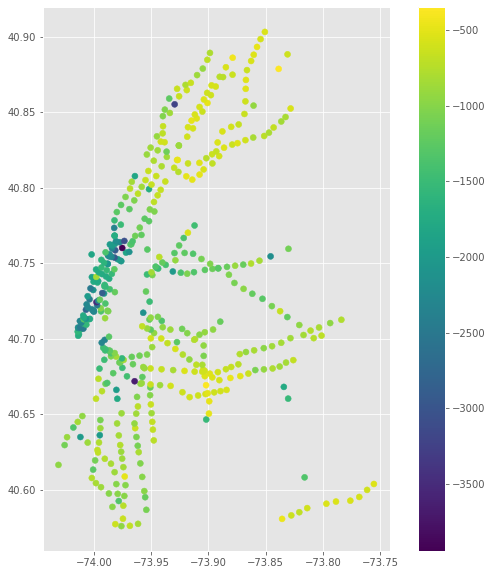

In [87]:
mtaGeo.plot(figsize=(10,10), column='pct_change_exits', legend=True)
ax.set_title('Exits %Change')

Text(0.5, 1.0, 'Entries %Change')

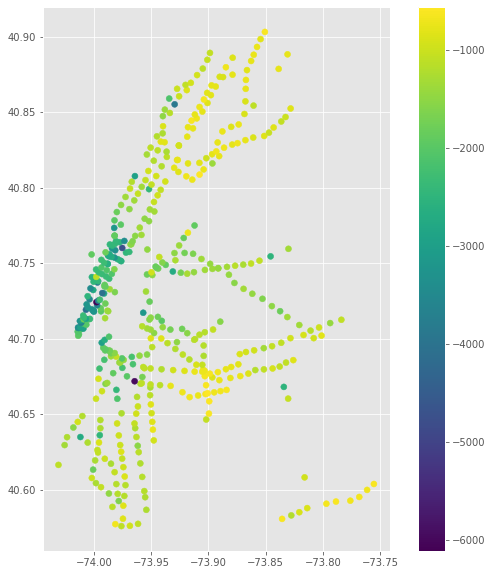

In [88]:
mtaGeo.plot(figsize=(10,10), column='pct_change_entries', legend=True)
ax.set_title('Entries %Change')

In [89]:
mtaGeo.head()

,lat,lon,entries2020,exits2020,entries2019,exits2019,pct_change_entries,pct_change_exits,geometry
0,40.57613,-73.97594,4010.0,3229.0,48907.0,34240.0,-1119.625935,-960.390214,POINT (-73.97594 40.57613)
1,40.57631,-73.96850,6747.0,4238.0,71341.0,33788.0,-957.373648,-697.262860,POINT (-73.96850 40.57631)
2,40.57742,-73.98123,71330.0,73814.0,567678.0,544354.0,-695.847470,-637.467147,POINT (-73.98123 40.57742)
3,40.57762,-73.96138,22399.0,19807.0,269081.0,184366.0,-1101.308094,-830.812339,POINT (-73.96138 40.57762)
4,40.58090,-73.83559,2273.0,3686.0,16160.0,20400.0,-610.954685,-453.445469,POINT (-73.83559 40.58090)


In [90]:
mtaGeo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [91]:
#Import Taxi Shapefile
taxi = gpd.read_file('/Users/nicoleallegretti/Desktop/NYU/Courses/02Spring21/PUI/Shapefiles/Taxi/taxi_fhv_yoy.shp')

In [92]:
taxi.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,trips,trips_ly,yoy,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,6.15625,86.50000,-0.928829,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,0.43750,1.03125,-0.575758,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,610.15625,1465.62500,-0.583689,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,497.96875,3736.59375,-0.866732,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,47.34375,163.87500,-0.711098,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [93]:
taxi.crs = 'epsg:4326'
mtaGeo.crs = 'epsg:4326'

In [94]:
subTaxi = gpd.sjoin(taxi, mtaGeo, op='intersects', how='inner')
subTaxi.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,trips,trips_ly,yoy,geometry,index_right,lat,lon,entries2020,exits2020,entries2019,exits2019,pct_change_entries,pct_change_exits
6,Queens,7.0,7.0,0.00039,0.107417,Astoria,1555.125,8622.125,-0.819636,"POLYGON ((-73.90414 40.76752, -73.90325 40.767...",313,40.75631,-73.91333,10197.0,10486.0,179216.0,150382.0,-1657.536530,-1334.121686
6,Queens,7.0,7.0,0.00039,0.107417,Astoria,1555.125,8622.125,-0.819636,"POLYGON ((-73.90414 40.76752, -73.90325 40.767...",314,40.75680,-73.92958,8269.0,9971.0,132178.0,138983.0,-1498.476237,-1293.872229
6,Queens,7.0,7.0,0.00039,0.107417,Astoria,1555.125,8622.125,-0.819636,"POLYGON ((-73.90414 40.76752, -73.90325 40.767...",315,40.75688,-73.92074,16446.0,18451.0,304306.0,247398.0,-1750.334428,-1240.837895
6,Queens,7.0,7.0,0.00039,0.107417,Astoria,1555.125,8622.125,-0.819636,"POLYGON ((-73.90414 40.76752, -73.90325 40.767...",325,40.76182,-73.92551,21414.0,22245.0,322075.0,299181.0,-1404.039413,-1244.935941
6,Queens,7.0,7.0,0.00039,0.107417,Astoria,1555.125,8622.125,-0.819636,"POLYGON ((-73.90414 40.76752, -73.90325 40.767...",334,40.76678,-73.92148,20137.0,22472.0,393939.0,329280.0,-1856.294383,-1365.290139


In [95]:
subTaxi.columns

Index(['borough', 'location_i', 'objectid', 'shape_area', 'shape_leng', 'zone',
       'trips', 'trips_ly', 'yoy', 'geometry', 'index_right', 'lat', 'lon',
       'entries2020', 'exits2020', 'entries2019', 'exits2019',
       'pct_change_entries', 'pct_change_exits'],
      dtype='object')

In [96]:


subTaxiAgg = subTaxi.groupby(['location_i'], as_index = False)\
    .agg({'borough':'first', 'shape_area':'first', 'shape_leng':'first', 'zone':'first',
       'trips':'first', 'trips_ly':'first', 'yoy':'first', 'geometry':'first', 
       'entries2020':'sum', 'exits2020':'sum', 'entries2019':'sum', 'exits2019':'sum',
       })


In [97]:

#Calculate percent change again on our aggregated entries and exits
subTaxiAgg['pct_change_entries'] = 100*(subTaxiAgg['entries2020']-subTaxiAgg['entries2019'])/subTaxiAgg['entries2020']
subTaxiAgg['pct_change_exits'] = 100*(subTaxiAgg['exits2020']-subTaxiAgg['exits2019'])/subTaxiAgg['exits2020']
subTaxiAgg

,location_i,borough,shape_area,shape_leng,zone,trips,trips_ly,yoy,geometry,entries2020,exits2020,entries2019,exits2019,pct_change_entries,pct_change_exits
0,7.0,Queens,0.000390,0.107417,Astoria,1555.12500,8622.12500,-0.819636,"POLYGON ((-73.90414 40.76752, -73.90325 40.767...",76463.0,83625.0,1331714.0,1165224.0,-1641.644979,-1293.391928
1,14.0,Brooklyn,0.001382,0.175214,Bay Ridge,890.65625,3927.00000,-0.773197,"POLYGON ((-74.03407 40.64431, -74.03284 40.643...",64143.0,64319.0,889547.0,743917.0,-1286.818515,-1056.605358
2,17.0,Brooklyn,0.000323,0.093523,Bedford,1830.06250,7257.40625,-0.747835,"POLYGON ((-73.94306 40.70142, -73.94220 40.700...",97620.0,115884.0,1161782.0,914737.0,-1090.106536,-689.355735
3,18.0,Bronx,0.000149,0.069800,Bedford Park,1418.87500,3585.21875,-0.604243,"POLYGON ((-73.88514 40.86638, -73.88594 40.865...",185818.0,130018.0,1728756.0,948204.0,-830.349051,-629.286714
4,21.0,Brooklyn,0.000380,0.115974,Bensonhurst East,534.65625,1938.65625,-0.724213,"POLYGON ((-73.97418 40.60946, -73.97403 40.608...",100529.0,88753.0,1280564.0,946094.0,-1173.825463,-965.985375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,258.0,Queens,0.000366,0.089013,Woodhaven,649.37500,2075.56250,-0.687133,"POLYGON ((-73.84504 40.68932, -73.84501 40.689...",52847.0,40857.0,697278.0,428249.0,-1219.427782,-948.165553
148,259.0,Bronx,0.000395,0.126750,Woodlawn/Wakefield,859.12500,1963.40625,-0.562431,"POLYGON ((-73.85107 40.91037, -73.85207 40.909...",25619.0,26676.0,203013.0,175405.0,-692.431399,-557.538611
149,260.0,Queens,0.000422,0.133514,Woodside,711.09375,3422.68750,-0.792241,"POLYGON ((-73.90175 40.76078, -73.90147 40.759...",45124.0,50005.0,664381.0,639047.0,-1372.345094,-1177.966203
150,261.0,Manhattan,0.000034,0.027120,World Trade Center,289.37500,4018.75000,-0.927994,"POLYGON ((-74.01333 40.70503, -74.01327 40.704...",184880.0,210086.0,4906837.0,4165346.0,-2554.065881,-1882.686138


In [98]:
subTaxi = GeoDataFrame(subTaxiAgg,crs="EPSG:4326", geometry=subTaxiAgg.geometry)

In [99]:
exclusion_zones = [190.0, #prospect park
                  43.0] #central park
subTaxi = subTaxi.loc[(subTaxi.location_i.isin(exclusion_zones)==False)]

Text(0.5, 1.0, 'Subway Entries %Change 2019 - 2020')

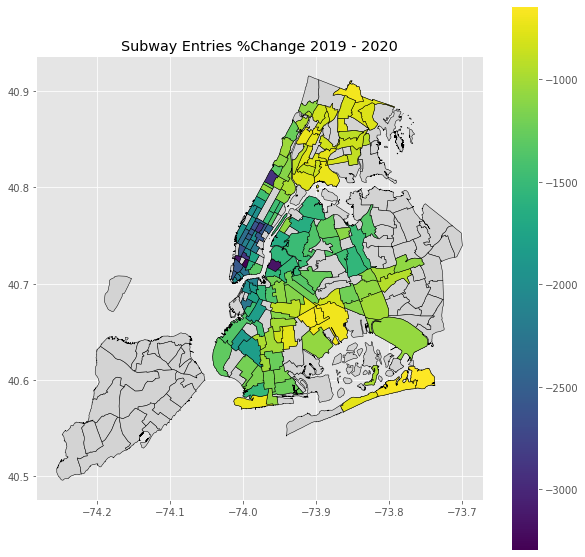

In [107]:
taxi_outline = taxi.plot(figsize=(10,10), color = 'lightgray', edgecolor = 'black')

subTaxi.plot(ax=taxi_outline, figsize=(12,12), column='pct_change_entries',
              legend=True, edgecolor = 'black')
plt.title('Subway Entries %Change 2019 - 2020')

#ax.set_title('Entries %Change')

In [ ]:
taxi_outline = taxi.plot(figsize=(12,12), color = 'lightgray', edgecolor = 'black')

subTaxi.plot(ax=taxi_outline, figsize=(12,12), column='pct_change_entries', legend=True, edgecolor = 'black')


ax.set_title('Entries %Change')

In [ ]:
subTaxi.to_file('/Users/nicoleallegretti/Desktop/NYU/Courses/02Spring21/PUI/Shapefiles/Subway/SubwayTurnstilesByTaxi_updated.shp')

In [ ]:
subTaxi

In [ ]:
mtaGeo.plot(figsize=(10,10), column='entries2019', scheme='Quantiles',legend=True)
ax.set_title('2019')

In [ ]:
mtaGeo.plot(figsize=(10,10), column='exits2019', scheme='Quantiles',legend=True)
ax.set_title('2019')

In [ ]:
stationsGeo = mta_stations.groupby(['lat','lon'])['entries_diff','exits_diff'].sum()
stationsGeo.head(20)